# 250119 Prueba Evaluacinón Data Science (cerca de feina)

# <span style="background-color: #333333; color: white">----------------- ESTEBAN ANDUEZA -----------------

# <span style="background-color: #333333; color: white"> <font color='#00FF00'>0.- DATASET ELEGIDO, JUSTIFICACIÓN DEL MODELO Y METODOLOGÍA: 
En estos momentos estoy ayudando a una amiga a buscar un local en Barcelona para establecer un negocio de impresión editorial y exposición al público de obras de arte. Por lo tanto __ELIJO TRABAJAR CON EL DATASET__: _Censo de locales en planta baja destinados a actividad económica de la ciudad de Barcelona en el Año 2022_, con el fin de obtener conclusiones que me permitan ayudarla en su toma de decisiones. 
    

### **JUSTICIFICACIÓN DEL MODELO**
Utilizaré un modelo de aprendizaje automático supervisado de **Clasificación binaria**, cuyo objetivo será predecir si un local está **activo** o **pendiente de actividad** en función de características relevantes como ubicación, tamaño y tipo de actividad económica. 

Este enfoque lo considero adecuado porque:
1. La variable objetivo (*estado*) es categórica binaria.
2. Las características del dataset son claras y relevantes para el problema.
3. La clasificación binaria es un enfoque bien soportado por algoritmos como **Regresión Logística**, **Árboles de Decisión**, o **Random Forest**, lo que permitirá un análisis robusto y explicable.

La observación de los datos me permite ver que en el dataset se incluyen no pocas variables categóricas (como barrios o tipos de actividades), lo que ya me indica que voy a requierir convertirlas/ recodificarlas a variables dummies, con todo lo que eso conlleva.


### **METODOLOGÍA:**
El análisis se realizará en cinco etapas principales:

#### 1. **Carga y exploración inicial de los datos:**
   - Cargar el dataset y realizar un análisis exploratorio básico (*Exploratory Data Analysis - EDA*).
   - Identificar la variable objetivo (*estado*: activo/pendiente de actividad).
   - Detectar patrones iniciales, posibles valores faltantes y la distribución de las variables.

#### 2. **Preprocesamiento:**
   - Gestionar valores faltantes y atípicos, si existen.
   - Codificar variables categóricas mediante técnicas como *One-Hot Encoding*.
   - Escalar las variables numéricas para garantizar la homogeneidad en el análisis, si es necesario.

#### 3. **Entrenamiento del modelo:**
   - Dividir el dataset en conjuntos de entrenamiento y prueba.
   - Entrenar un modelo básico de clasificación como **Regresión Logística**, **Árboles de Decisión**, o **Random Forest**.
   - Ajustar hiperparámetros básicos para optimizar el rendimiento.

#### 4. **Evaluación del modelo:**
   - Evaluar el desempeño utilizando métricas clave como:
     - Precisión (*accuracy*).
     - Recall.
     - F1-score.
     - Matriz de confusión.
   - Identificar las variables más influyentes en la predicción del estado del local.

#### 5. **Elaboración de conclusiones**

    
    
    
Paso directamente a la elaboración del análisis    



# <span style="background-color: #333333; color: white"> <font color='#00FF00'> 1.- CARGA Y EXPLORACIÓN INICIAL DE DATOS
    
- Cargar el dataset y realizar un análisis exploratorio básico (*Exploratory Data Analysis - EDA*).
- Identificar la variable objetivo (*estado*: activo/pendiente de actividad).
- Detectar patrones iniciales, posibles valores faltantes y la distribución de las variables.

In [1]:
# Importar pandas
import pandas as pd

# Ruta del archivo
ruta_archivo_2022 = "/Users/Esteban/OneDrive/DATOS E/Curso 230918 DATA SCIENCE (IT-ACAD Sept 2023 a Mar 2024)/Sprint 13.- PRUEBA TÉCNICA PARA SEGUIR EN LA RECERCA DE FEINA/250118 DATASET 2.- Censo locales en planta baja destinados a actividad económica/220930_censcomercialbcn_opendata_2022_v10_mod.csv"

# Importar el archivo CSV
df_2022 = pd.read_csv(ruta_archivo_2022)

# Ver las primeras filas del DataFrame para verificar que se haya importado correctamente
df_2022.head()    

/var/folders/wh/3h79ym1n42x9ph78jjbzdyqr0000gp/T/ipykernel_27542/3228325100.py:8: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2022 = pd.read_csv(ruta_archivo_2022)


,ID_Global,ID_Bcn_2016,Codi_Principal_Activitat,Nom_Principal_Activitat,Codi_Sector_Activitat,Nom_Sector_Activitat,Codi_Grup_Activitat,Nom_Grup_Activitat,Codi_Activitat_2022,Nom_Activitat,...,Solar,Codi_Parcela,Codi_Illa,Seccio_Censal,Codi_Barri,Nom_Barri,Codi_Districte,Nom_Districte,Referencia_Cadastral,Data_Revisio
0,2577e29a-b8d7-41f9-b751-49507d679c94,53938.0,1,Actiu,2,Serveis,16,Altres,1600102,Activitats emmagatzematge,...,574888.0,32.0,92670.0,47,60,Sant Andreu,9,Sant Andreu,2272432DF3827C,2021-06-22
1,a2463c00-b817-408f-ad31-cf32c08ca00a,53941.0,1,Actiu,2,Serveis,9,Ensenyament,9000000,Ensenyament,...,159607.0,22.0,92670.0,47,60,Sant Andreu,9,Sant Andreu,2272422DF3827C,2021-06-22
2,47706876-da40-4fc8-b1dd-03730ca86205,53918.0,1,Actiu,2,Serveis,16,Altres,1600400,Serveis a les empreses i oficines,...,307364.0,8.0,92663.0,47,60,Sant Andreu,9,Sant Andreu,2272908DF3827A,2021-06-22
3,82c0708f-577b-4304-a7f2-6e3982a8935e,53964.0,1,Actiu,2,Serveis,9,Ensenyament,9000000,Ensenyament,...,142660.0,22.0,92740.0,47,60,Sant Andreu,9,Sant Andreu,2173822DF3827C,2021-06-22
4,a3bd8a79-b4e8-4989-ad4b-ac6296701fec,53967.0,1,Actiu,2,Serveis,16,Altres,1600400,Serveis a les empreses i oficines,...,142661.0,23.0,92740.0,47,60,Sant Andreu,9,Sant Andreu,2173823DF3827C,2021-06-22


In [2]:
# Visualización de las primeras y últimas filas del DataFrame
df_2022

,ID_Global,ID_Bcn_2016,Codi_Principal_Activitat,Nom_Principal_Activitat,Codi_Sector_Activitat,Nom_Sector_Activitat,Codi_Grup_Activitat,Nom_Grup_Activitat,Codi_Activitat_2022,Nom_Activitat,...,Solar,Codi_Parcela,Codi_Illa,Seccio_Censal,Codi_Barri,Nom_Barri,Codi_Districte,Nom_Districte,Referencia_Cadastral,Data_Revisio
0,2577e29a-b8d7-41f9-b751-49507d679c94,53938.0,1,Actiu,2,Serveis,16,Altres,1600102,Activitats emmagatzematge,...,574888.0,32.0,92670.0,47,60,Sant Andreu,9,Sant Andreu,2272432DF3827C,2021-06-22
1,a2463c00-b817-408f-ad31-cf32c08ca00a,53941.0,1,Actiu,2,Serveis,9,Ensenyament,9000000,Ensenyament,...,159607.0,22.0,92670.0,47,60,Sant Andreu,9,Sant Andreu,2272422DF3827C,2021-06-22
2,47706876-da40-4fc8-b1dd-03730ca86205,53918.0,1,Actiu,2,Serveis,16,Altres,1600400,Serveis a les empreses i oficines,...,307364.0,8.0,92663.0,47,60,Sant Andreu,9,Sant Andreu,2272908DF3827A,2021-06-22
3,82c0708f-577b-4304-a7f2-6e3982a8935e,53964.0,1,Actiu,2,Serveis,9,Ensenyament,9000000,Ensenyament,...,142660.0,22.0,92740.0,47,60,Sant Andreu,9,Sant Andreu,2173822DF3827C,2021-06-22
4,a3bd8a79-b4e8-4989-ad4b-ac6296701fec,53967.0,1,Actiu,2,Serveis,16,Altres,1600400,Serveis a les empreses i oficines,...,142661.0,23.0,92740.0,47,60,Sant Andreu,9,Sant Andreu,2173823DF3827C,2021-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66083,dfca2f59-b99d-4925-b670-81ed5599bbf4,NaN,1,Actiu,3,Altres,17,Altres,1700200,Associacions,...,305165.0,6.0,12502.0,23,2,el Barri Gòtic,1,Ciutat Vella,1120206DF3812A,2021-04-07
66084,1ee5dc95-c852-404d-b67f-bdd6416de722,42509.0,1,Actiu,2,Serveis,9,Ensenyament,9000000,Ensenyament,...,583035.0,55.0,16252.0,27,19,les Corts,4,Les Corts,7424655DF2872C,2021-04-13
66085,d573ced5-9d22-4125-8654-5cfd79907996,42870.0,1,Actiu,2,Serveis,9,Ensenyament,9000000,Ensenyament,...,568029.0,1.0,16936.0,53,21,Pedralbes,4,Les Corts,5924301DF2852D,2022-07-18
66086,968cb78f-d18f-47ff-abc7-9d253a19006b,NaN,1,Actiu,2,Serveis,14,"Restaurants, bars i hotels (Inclòs hostals, pe...",1400001,Bars / CIBERCAFÈ,...,568029.0,1.0,16936.0,53,21,Pedralbes,4,Les Corts,5924301DF2852D,2022-07-18


### ANÁLISIS ESTADÍSTICO DEL CONJUNTO DE DATOS (EDA = Exploratory Data Analysis)

A continuación realizaré diferentes pruebas, aplicaré métodos y solicitaré visualizaciones con el objetivo de obtener: 
- Información sobre el tipo de datos y detección de valores nulos
- descripción estadística de las variables.
- detección de valores faltantes.
- identificación de la distribución de las variables.
- correlación de las variables entre sí.
- identificación de las variables categóricas y numéricas.

In [3]:
# Información general del DataFrame
print("Información del dataset:")
print(df_2022.info())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66088 entries, 0 to 66087
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID_Global                 66088 non-null  object 
 1   ID_Bcn_2016               58019 non-null  float64
 2   Codi_Principal_Activitat  66088 non-null  int64  
 3   Nom_Principal_Activitat   66088 non-null  object 
 4   Codi_Sector_Activitat     66088 non-null  int64  
 5   Nom_Sector_Activitat      66088 non-null  object 
 6   Codi_Grup_Activitat       66088 non-null  int64  
 7   Nom_Grup_Activitat        66088 non-null  object 
 8   Codi_Activitat_2022       66088 non-null  int64  
 9   Nom_Activitat             66088 non-null  object 
 10  Codi_Activitat_2016       66088 non-null  object 
 11  Nom_Local                 66088 non-null  object 
 12  SN_Oci_Nocturn            66088 non-null  object 
 13  SN_Coworking              66088 non-

In [4]:
# Revisión de valores faltantes
print("\nCantidad de valores nulos por columna:")
print(df_2022.isnull().sum())


Cantidad de valores nulos por columna:
ID_Global                       0
ID_Bcn_2016                  8069
Codi_Principal_Activitat        0
Nom_Principal_Activitat         0
Codi_Sector_Activitat           0
Nom_Sector_Activitat            0
Codi_Grup_Activitat             0
Nom_Grup_Activitat              0
Codi_Activitat_2022             0
Nom_Activitat                   0
Codi_Activitat_2016             0
Nom_Local                       0
SN_Oci_Nocturn                  0
SN_Coworking                    0
SN_Servei_Degustacio            0
SN_Obert24h                     0
SN_Mixtura                      0
SN_Carrer                       0
SN_Mercat                       0
Nom_Mercat                  63934
SN_Galeria                      0
Nom_Galeria                 65774
SN_CComercial                   0
Nom_CComercial              65245
SN_Eix                          0
Nom_Eix                     45406
X_UTM_ETRS89                    0
Y_UTM_ETRS89                    0
Latitud 

In [5]:
# IDENTIFICACIÓN DE VALORES ÚNICOS POR VARIABLE

# Identificar valores únicos por variable
unique_values = df_2022.nunique()

print("Número de valores únicos por variable:")
print(unique_values)

Número de valores únicos por variable:
ID_Global                   66088
ID_Bcn_2016                 58019
Codi_Principal_Activitat        2
Nom_Principal_Activitat         2
Codi_Sector_Activitat           3
Nom_Sector_Activitat            7
Codi_Grup_Activitat            18
Nom_Grup_Activitat             16
Codi_Activitat_2022            83
Nom_Activitat                  79
Codi_Activitat_2016            83
Nom_Local                   46809
SN_Oci_Nocturn                  2
SN_Coworking                    2
SN_Servei_Degustacio            2
SN_Obert24h                     2
SN_Mixtura                      2
SN_Carrer                       2
SN_Mercat                       2
Nom_Mercat                     55
SN_Galeria                      2
Nom_Galeria                    10
SN_CComercial                   2
Nom_CComercial                 11
SN_Eix                          2
Nom_Eix                        22
X_UTM_ETRS89                63157
Y_UTM_ETRS89                63157
Latitud  

In [6]:
# DESCRIPCIÓN ESTADÍSTICA DE LAS VARIABLES
df_2022.describe()

,ID_Bcn_2016,Codi_Principal_Activitat,Codi_Sector_Activitat,Codi_Grup_Activitat,Codi_Activitat_2022,X_UTM_ETRS89,Y_UTM_ETRS89,Latitud,Longitud,Codi_Via,Porta,Num_Policia_Inicial,Num_Policia_Final,Solar,Codi_Parcela,Codi_Illa,Seccio_Censal,Codi_Barri,Codi_Districte
count,58019.000000,66088.000000,66088.000000,66088.000000,6.608800e+04,66088.000000,6.608800e+04,66088.000000,66088.000000,66088.000000,63045.000000,66087.000000,66080.000000,65984.000000,65995.000000,65995.000000,66088.000000,66088.000000,66088.000000
mean,41604.459281,0.891357,1.859127,9.314565,2.088482e+06,430216.161921,4.583622e+06,41.401108,2.165168,198961.478650,22.315425,111.508950,112.500953,248327.657659,11.714933,47695.592242,59.814974,28.587051,5.036784
std,21743.719055,0.311193,0.691582,6.531307,2.000116e+06,1813.057666,2.227813e+03,0.020138,0.021571,130999.057107,28.925042,152.019128,149.627018,181510.596868,12.269607,30979.495278,40.244692,22.348009,3.066499
min,4215.000000,0.000000,1.000000,0.000000,1.000000e+01,423799.475627,4.577403e+06,41.344821,2.088023,306.000000,3.000000,0.000000,0.000000,792.000000,1.000000,5010.000000,1.000000,1.000000,1.000000
25%,22656.500000,1.000000,1.000000,2.000000,1.100000e+06,428867.120040,4.581804e+06,41.384713,2.149168,94118.500000,10.000000,17.000000,18.000000,120438.750000,3.000000,20990.000000,28.000000,8.000000,2.000000
50%,41710.000000,1.000000,2.000000,12.000000,1.600102e+06,430271.649691,4.583432e+06,41.399378,2.165895,187207.000000,10.000000,53.000000,54.000000,147243.000000,9.000000,40470.000000,53.000000,25.000000,5.000000
75%,61466.500000,1.000000,2.000000,16.000000,1.700600e+06,431467.576602,4.584965e+06,41.413293,2.180025,288626.500000,20.000000,153.000000,155.000000,306026.000000,16.000000,80570.000000,83.000000,45.000000,8.000000
max,78056.000000,1.000000,3.000000,17.000000,9.000000e+06,434876.705365,4.590873e+06,41.466530,2.220789,701801.000000,900.000000,9999.000000,9999.000000,583998.000000,302.000000,99535.000000,237.000000,73.000000,10.000000


In [7]:
# Distribución de la variable target
print("\nDistribución de 'estado':")
print(df_2022['Nom_Principal_Activitat'].value_counts()) 


Distribución de 'estado':
Actiu                        58908
Sense activitat Econòmica     7180
Name: Nom_Principal_Activitat, dtype: int64


### **CONCLUSIONES DE LA VISUALIZACIÓN DEL DATASET Y DEL ANÁLISIS EDA:**

#### 1. Tamaño del Dataset:
El dataset contiene 66,088 filas y 49 columnas.
Este tamaño es adecuado para un análisis predictivo, ya que proporciona una gran cantidad de datos para entrenar y evaluar el modelo.
#### 2. Variables: Tipos de datos:
- 30 columnas son categóricas [object]: Contienen texto o valores categóricos, como nombres, identificadores, o etiquetas.
- 11 columnas son numéricas de tipo float64: Contienen datos numéricos con decimales, como coordenadas, números de parcela, o tamaños.
- 8 columnas son numéricas de tipo int64: Contienen datos numéricos enteros, como códigos o identificadores.

#### 3. Valores Faltantes:
- Varias columnas tienen valores faltantes (aquellas que Non-Null Count < 66,088), lo que será importante abordar durante el preprocesamiento. Entre ellas vale la pena mencionar:
    - Nom_Mercat (nombre del mercado): Tiene solo 2,154 valores no nulos, por lo que gran parte de los establecimientos no están en el área de los mercas.
    - Nom_Galeria (nombre de la galería): Tiene 314 valores no nulos, por lo que hay muy pocos etablecimientos asociados a galerías.
    - Nom_CComercial (nombre del centro comercial): Tiene 843 valores no nulos: hay pocos establecimientos en centros comerciales.
    - Estas variables probablemente no serán útiles para el modelo debido a la alta proporción de valores faltantes.
- Variables como Porta y Lletra_Inicial tienen algunos valores faltantes (por ejemplo, 3,000 faltantes en Porta), pero con una proporción menor. No obstante, se puede avanzar que el dato de Puerta y Letra inicial no va a ser relevante para el análisis

#### 4. Variable Target:
Aparentemente, la columna __Nom_Principal_Activitat__ indica el estado del local (si está activo o pendiente de actividad). Por lo tanto estimo que esta será mi variable target para la tarea de clasificación.

#### 5. Posibles Columnas Útiles para el Análisis:
A partir de esta revisión, puedo decir que a priori, puede haber hay varias columnas que parecen prometedoras para el análisis:

- Características espaciales:
    - Latitud, Longitud, X_UTM_ETRS89, Y_UTM_ETRS89: Coordenadas geográficas que podrían ser útiles para identificar patrones basados en la ubicación.
    - Nom_Barri, Nom_Districte: Barrio y distrito del local, que podrían influir en el estado del local.
- Características categóricas:
    - Nom_Activitat, Nom_Sector_Activitat, Nom_Grup_Activitat: Descripciones del sector y actividad del local.
- Características numéricas:
    - Solar, Num_Policia_Inicial, Num_Policia_Final: Datos relacionados con el tamaño o ubicación del local.


### ANÁLISIS DE LA DISTRIBUCIÓN DE VARIABLES

In [8]:
# Importación de librerías
import matplotlib.pyplot as plt
import seaborn as sns


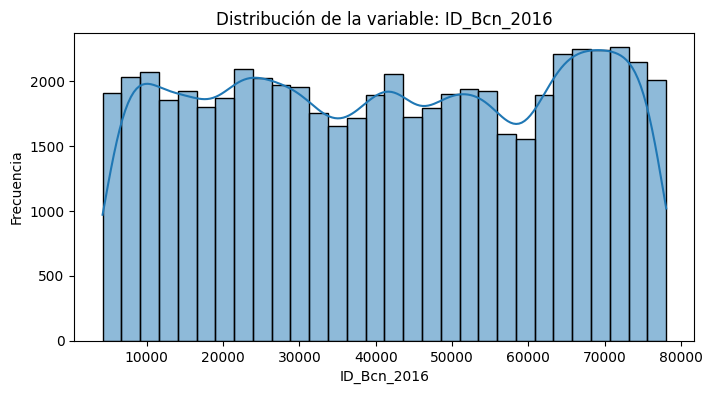

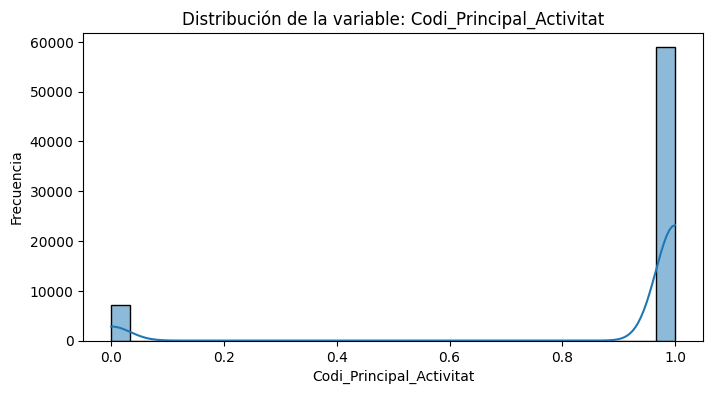

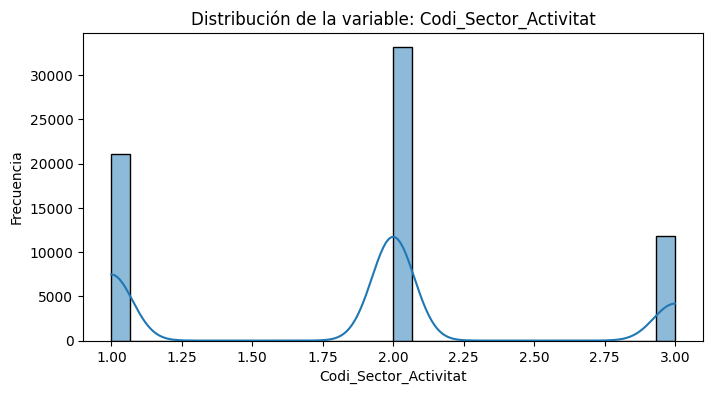

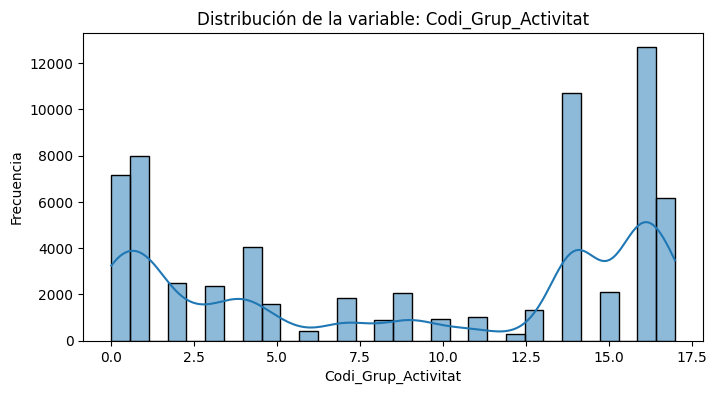

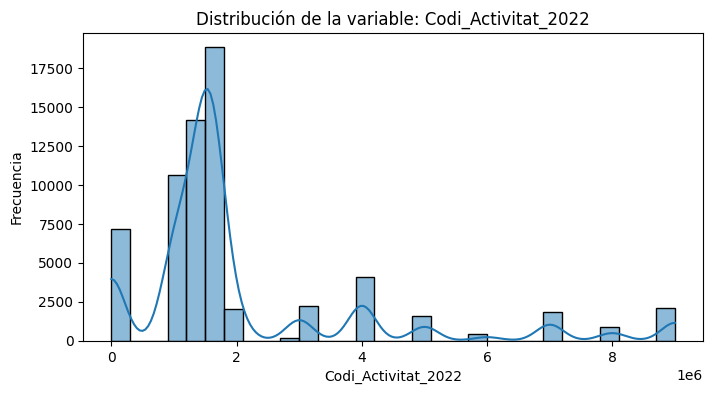

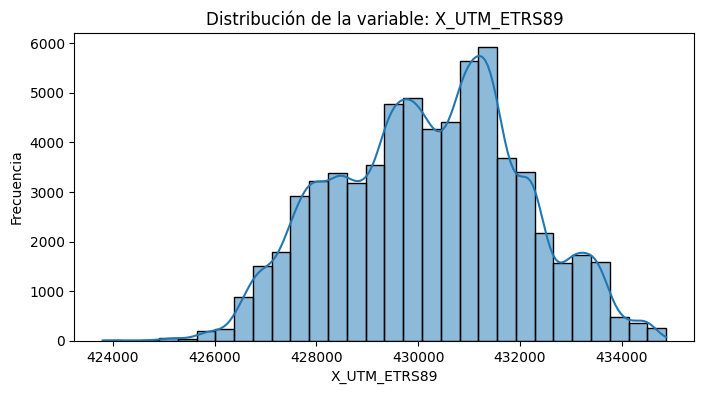

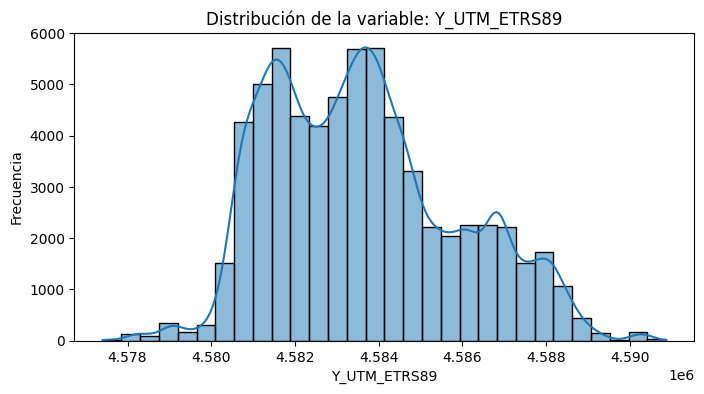

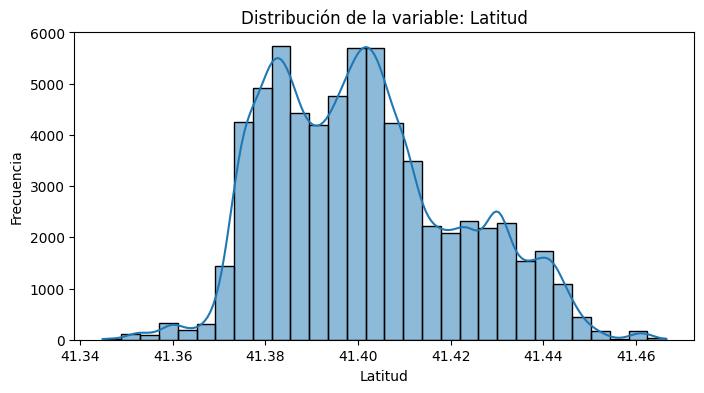

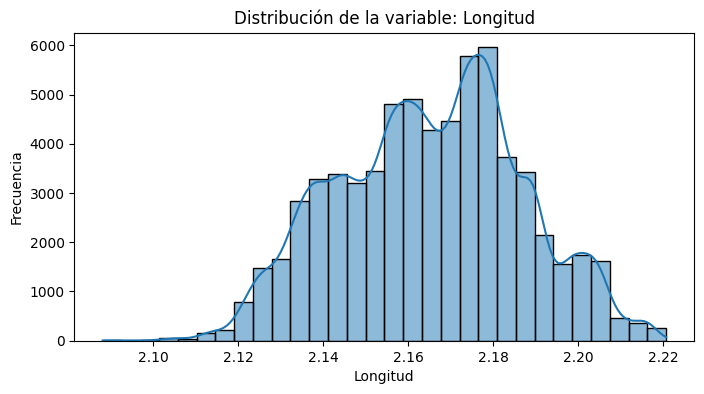

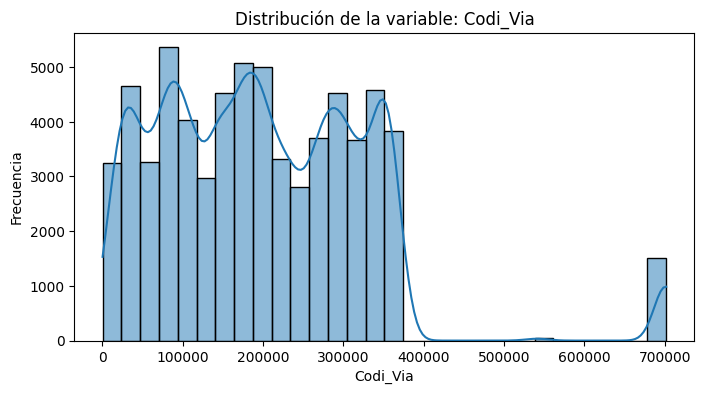

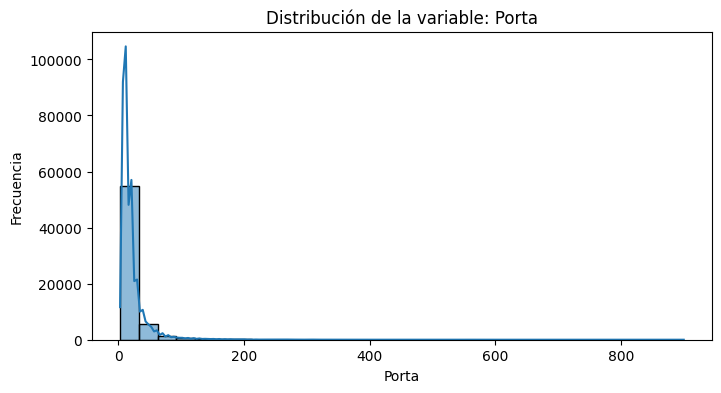

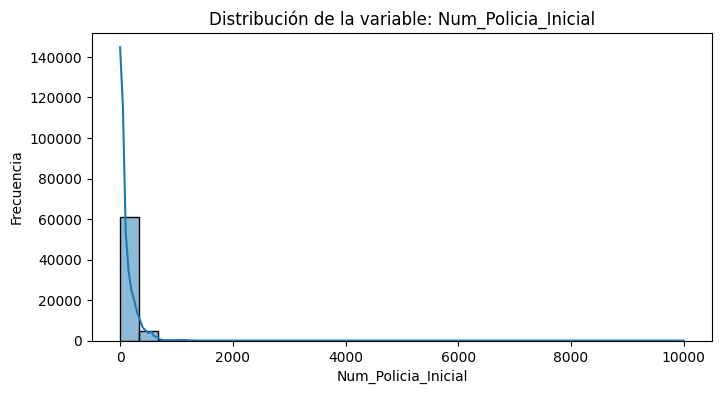

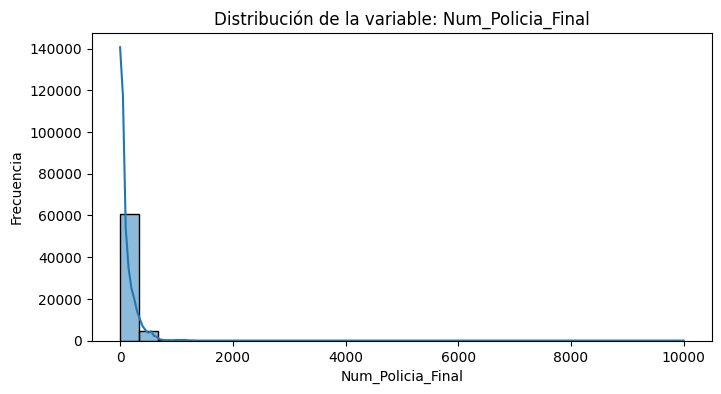

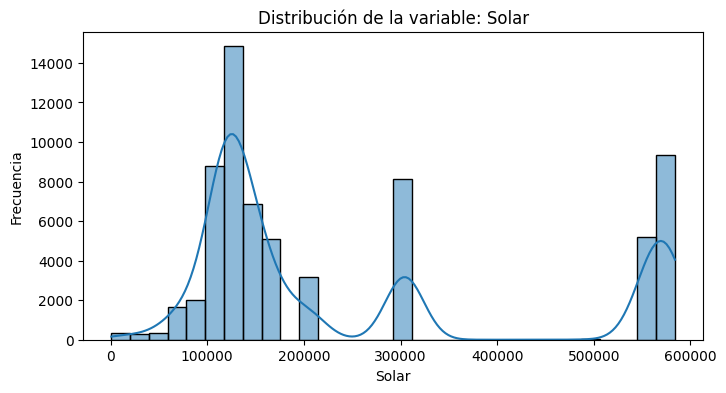

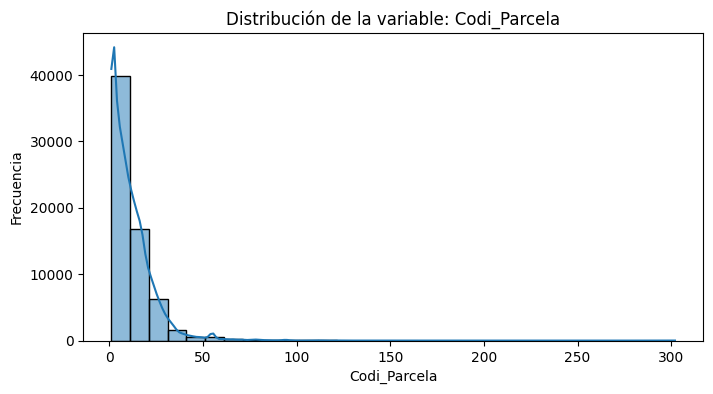

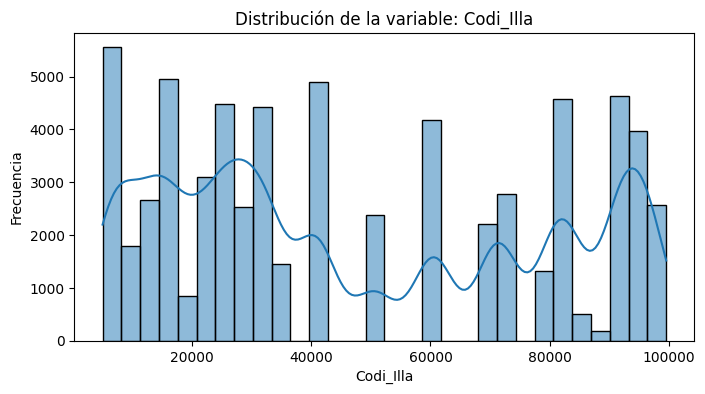

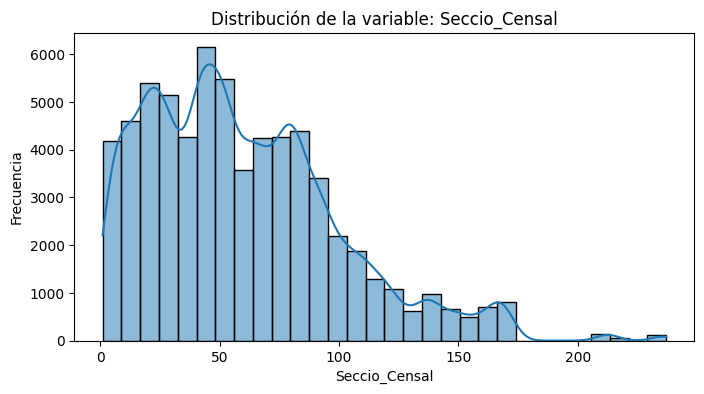

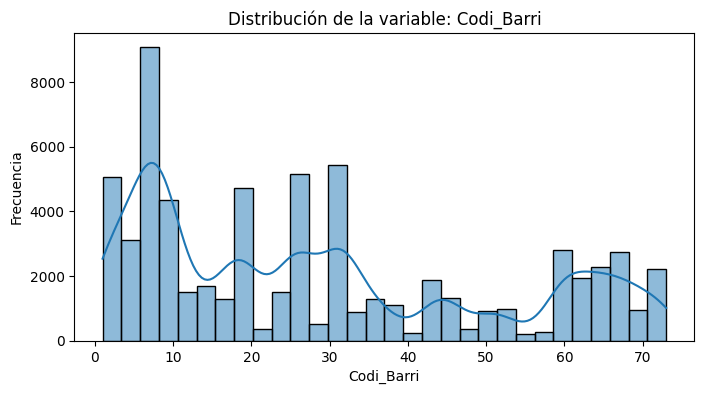

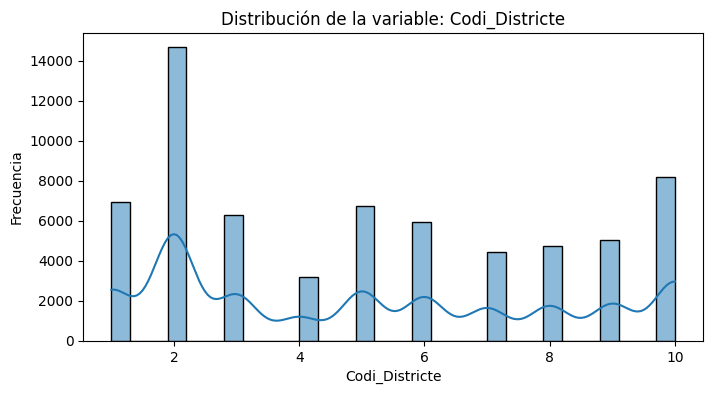

In [9]:
# Distribución de variables numéricas
numerical_columns = df_2022.select_dtypes(include=['float64', 'int64']).columns

# Histogramas
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_2022[col], kde=True, bins=30)
    plt.title(f"Distribución de la variable: {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()


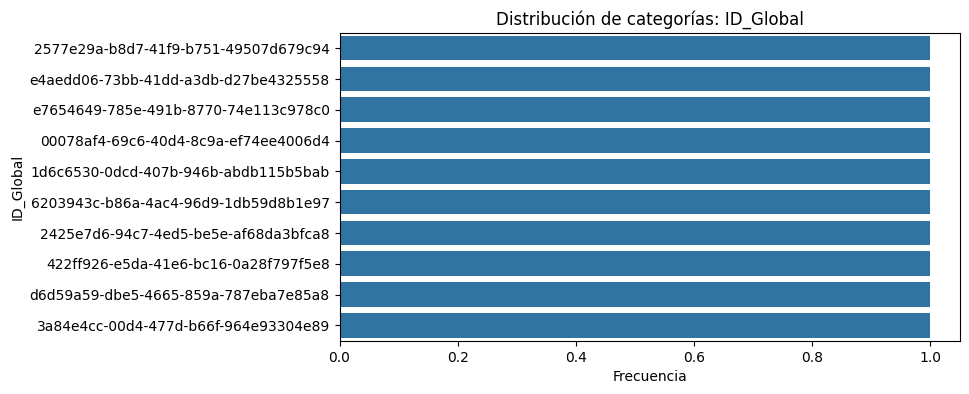

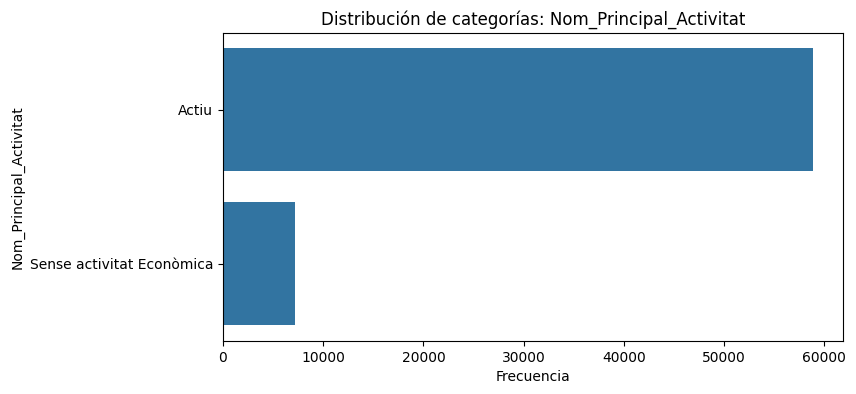

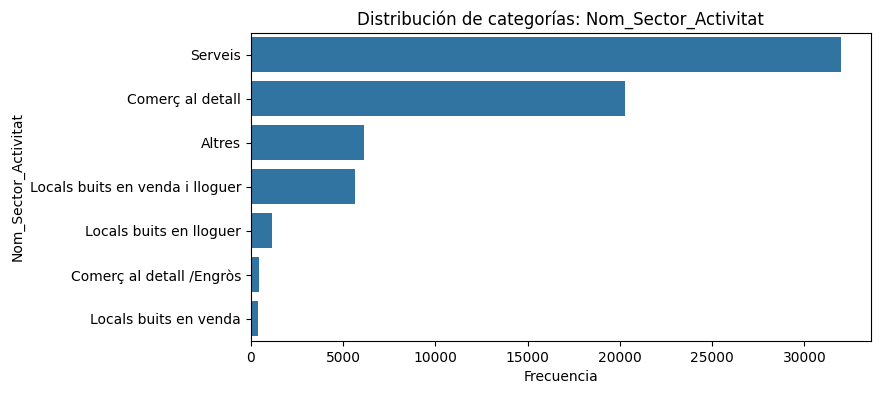

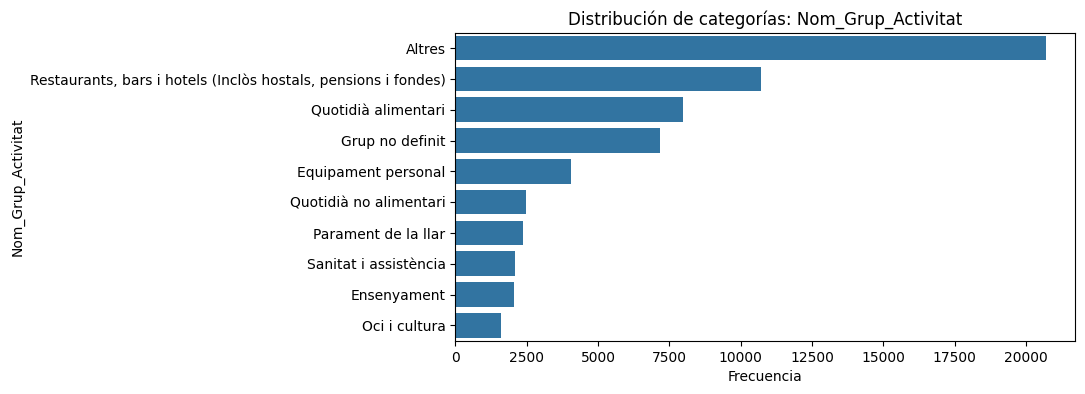

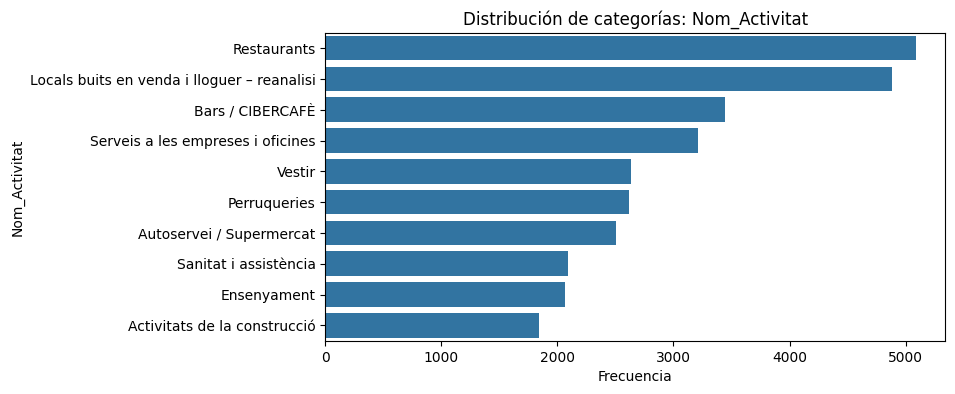

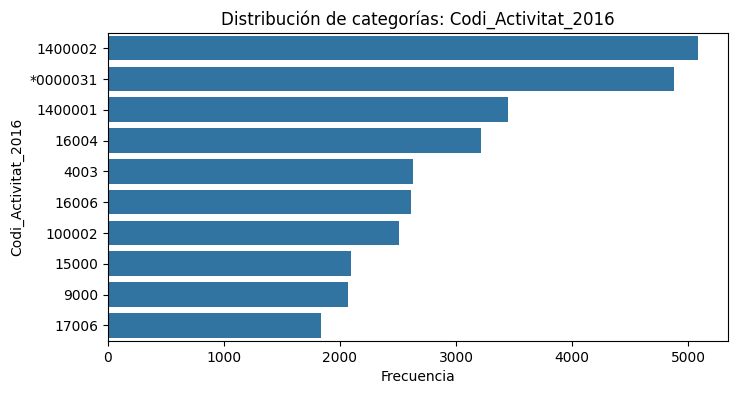

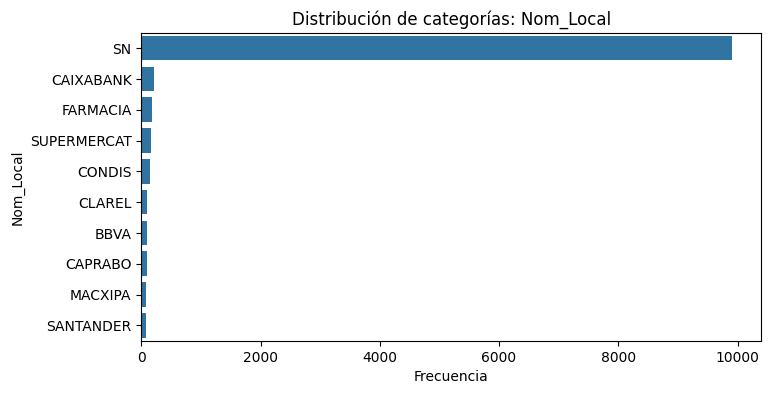

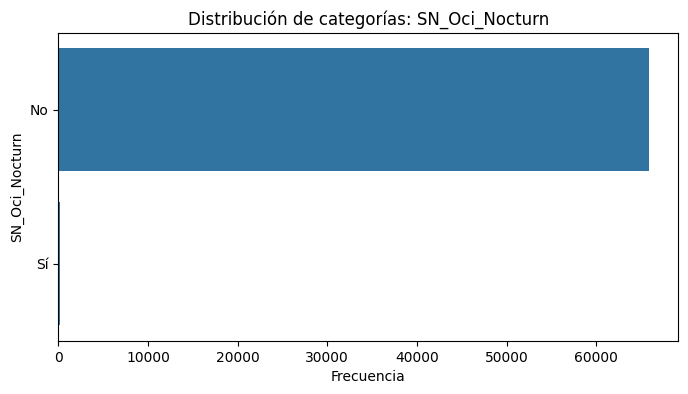

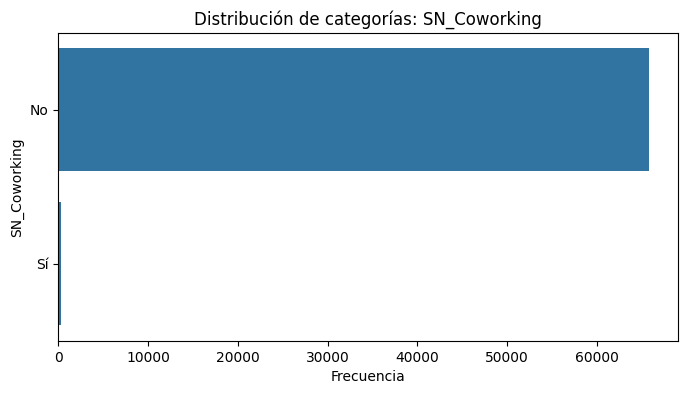

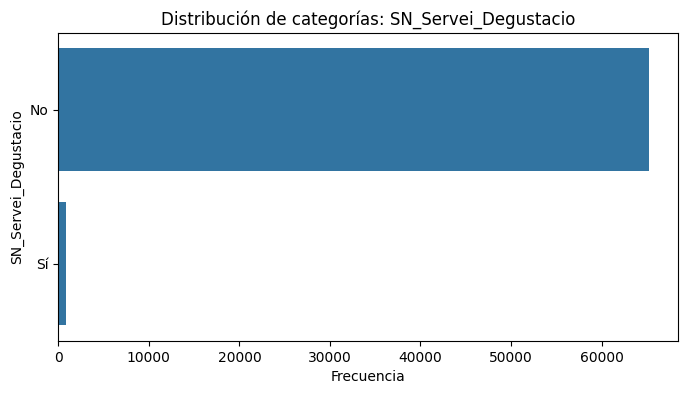

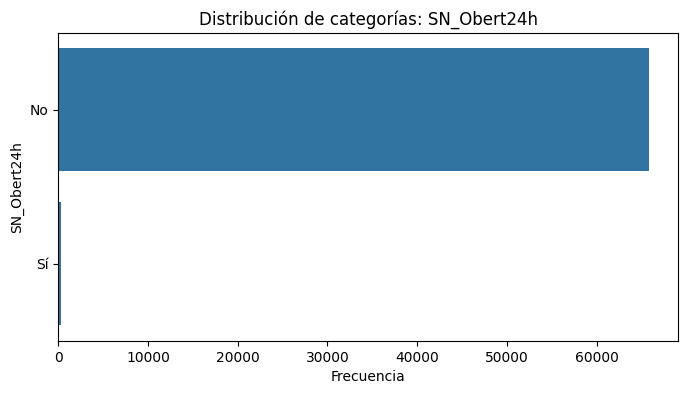

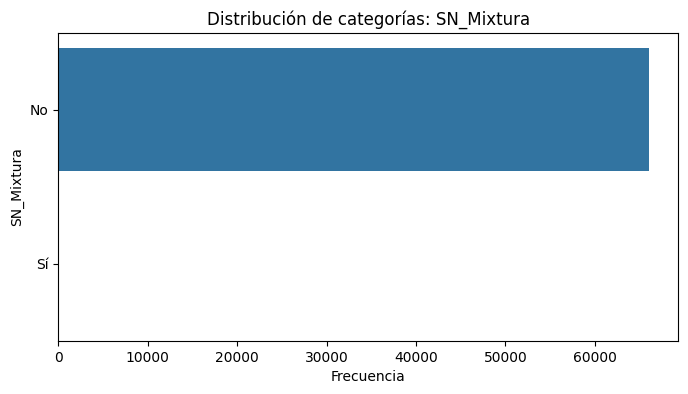

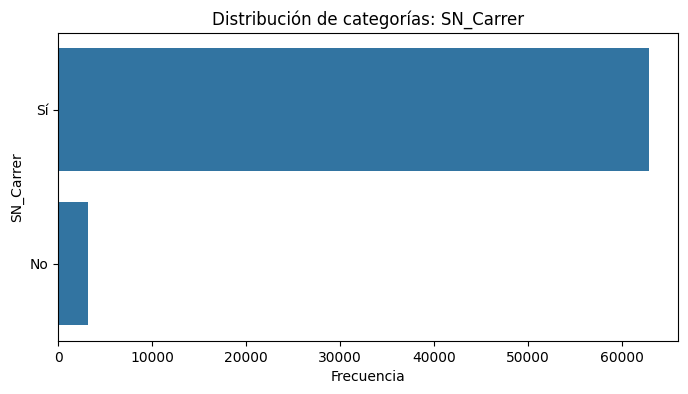

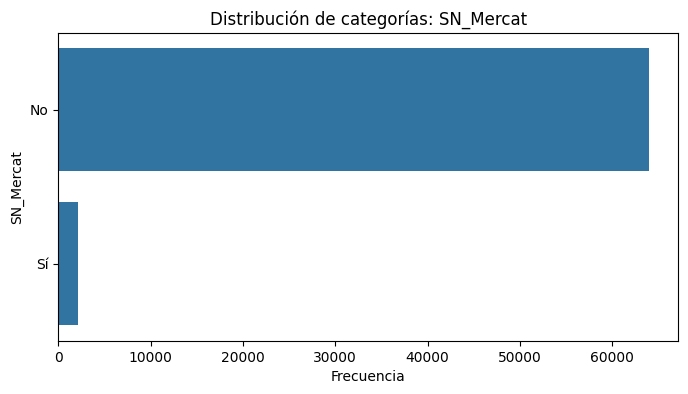

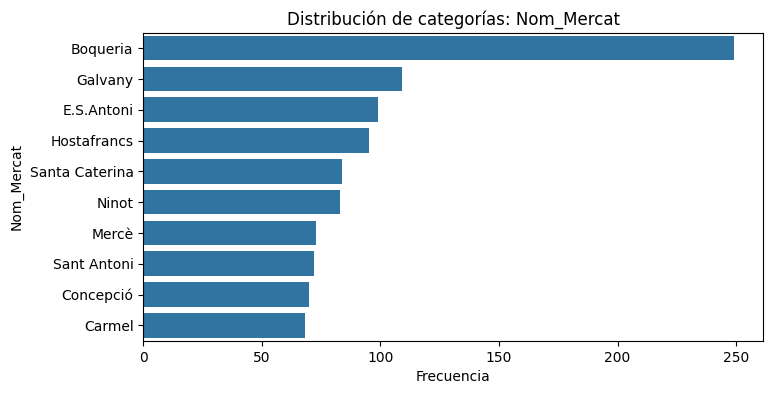

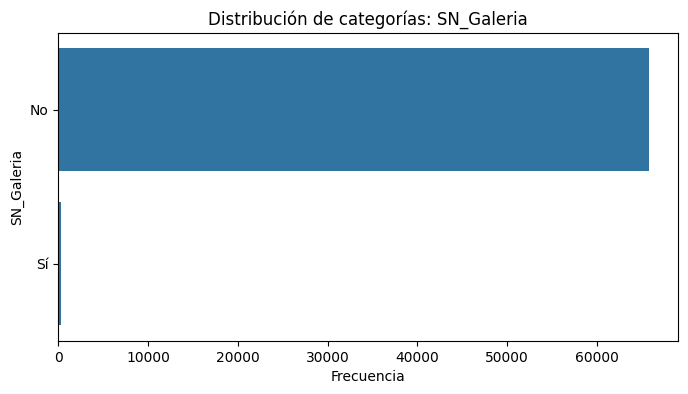

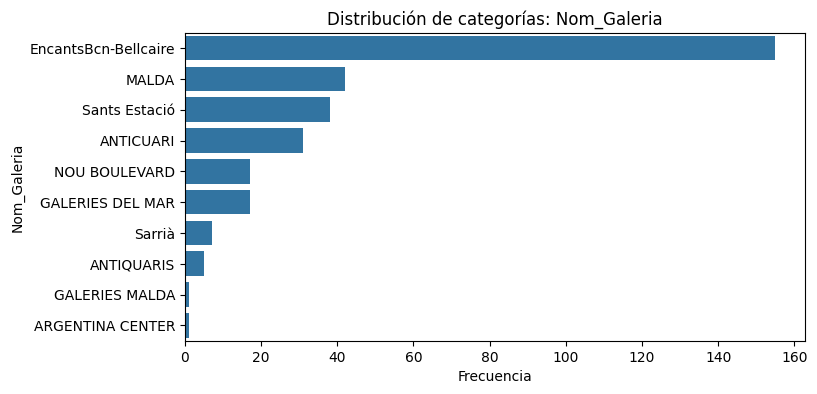

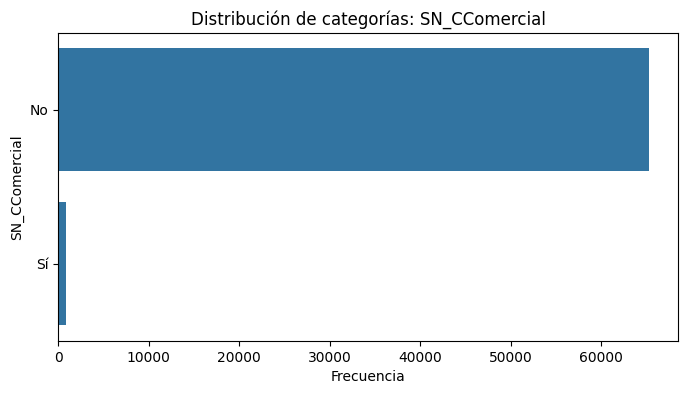

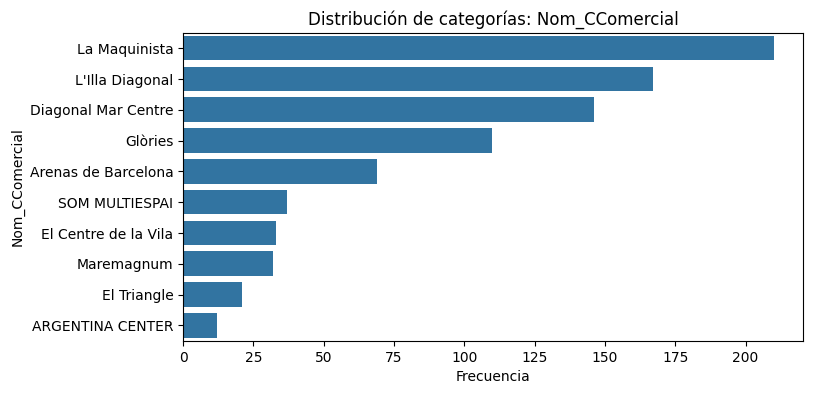

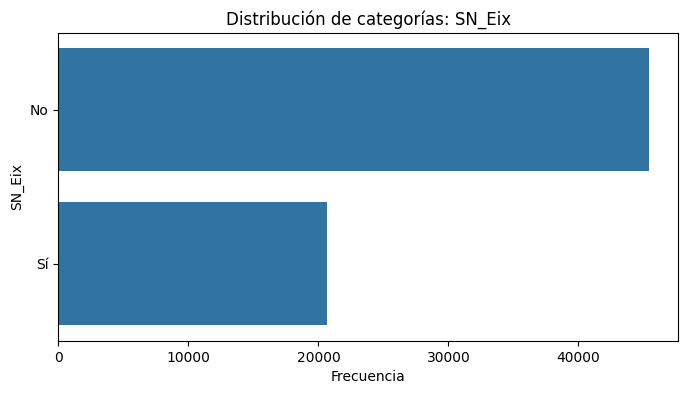

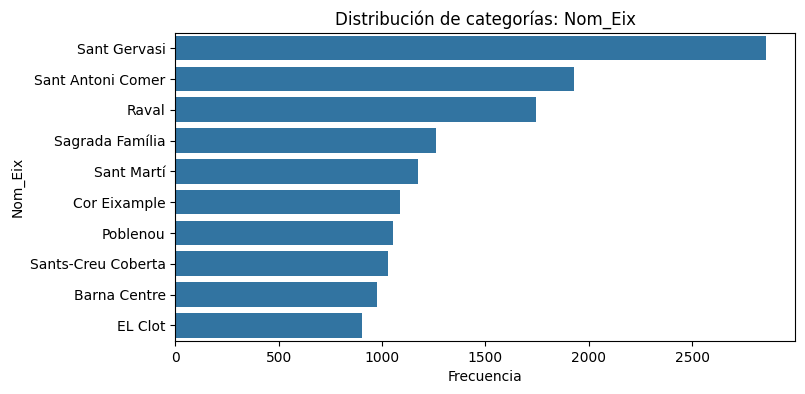

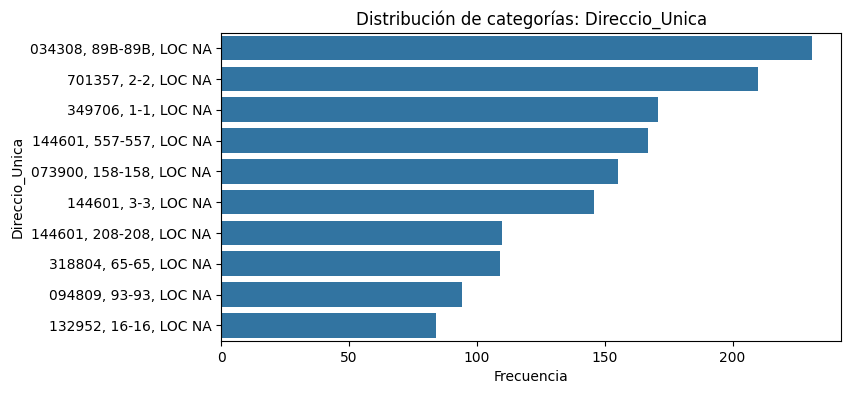

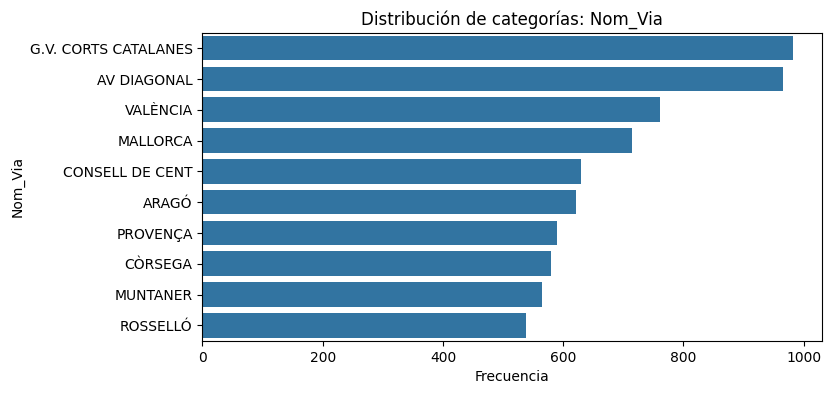

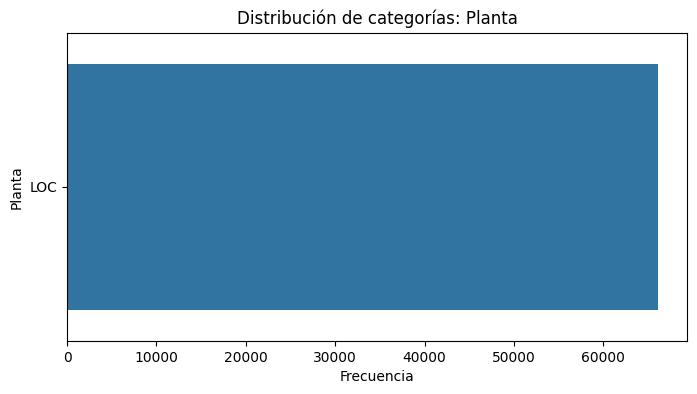

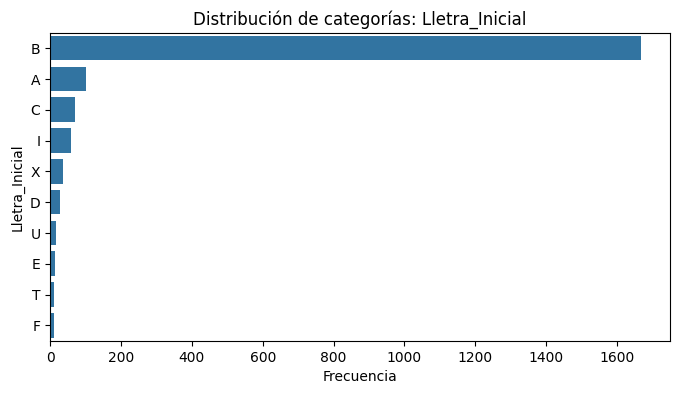

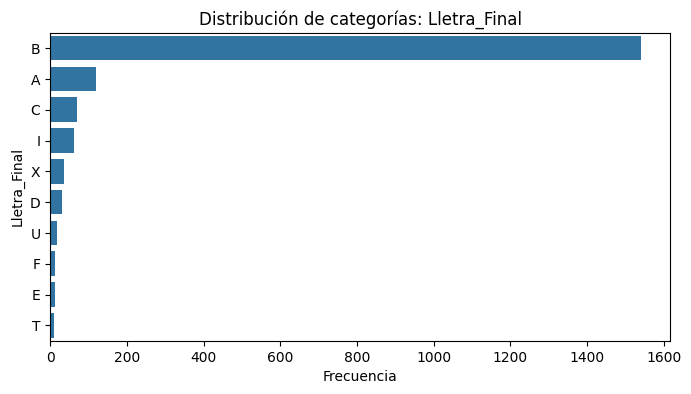

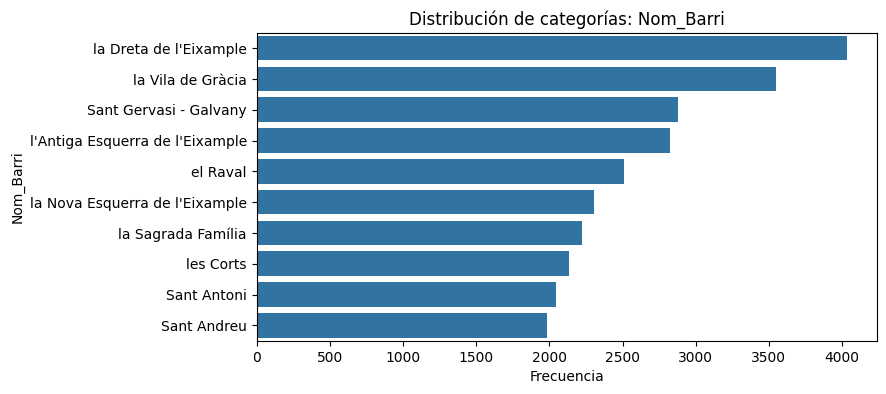

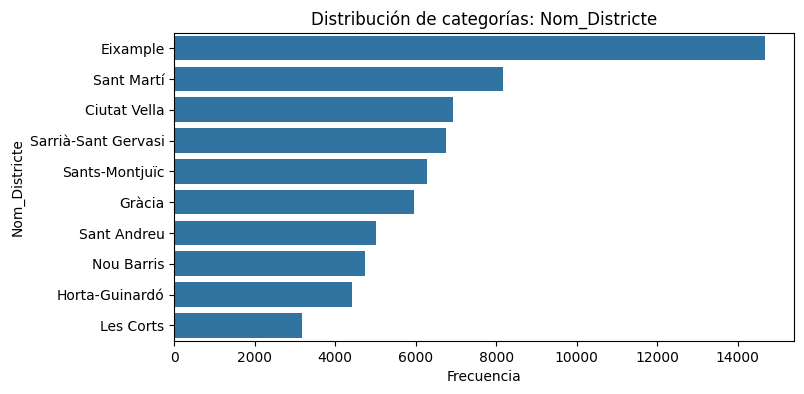

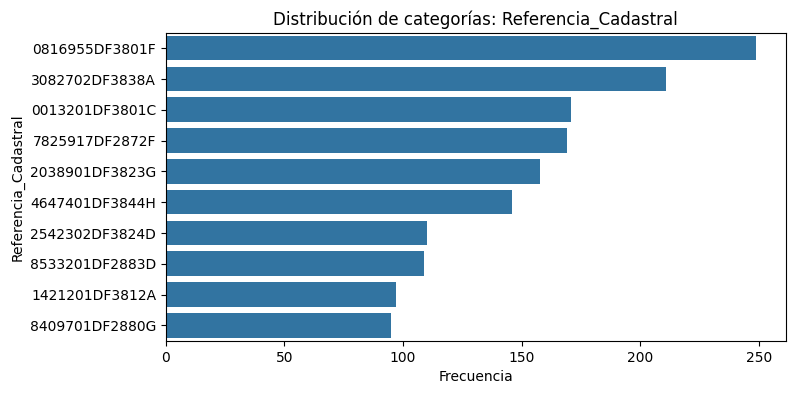

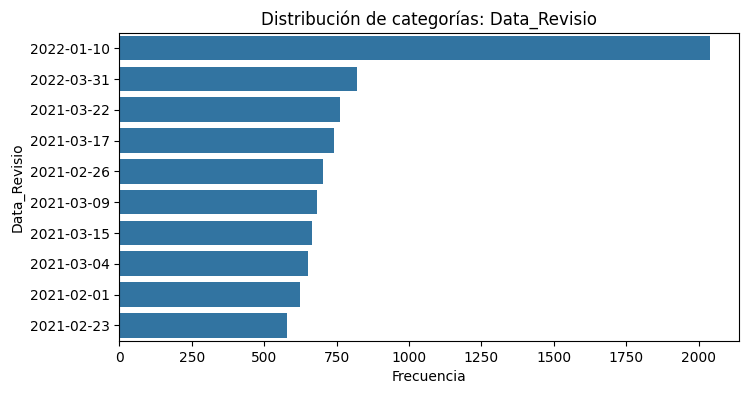

In [10]:
# Distribución de variables categóricas
categorical_columns = df_2022.select_dtypes(include=['object']).columns

# Contar categorías
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_2022, y=col, order=df_2022[col].value_counts().index[:10])
    plt.title(f"Distribución de categorías: {col}")
    plt.xlabel("Frecuencia")
    plt.ylabel(col)
    plt.show()

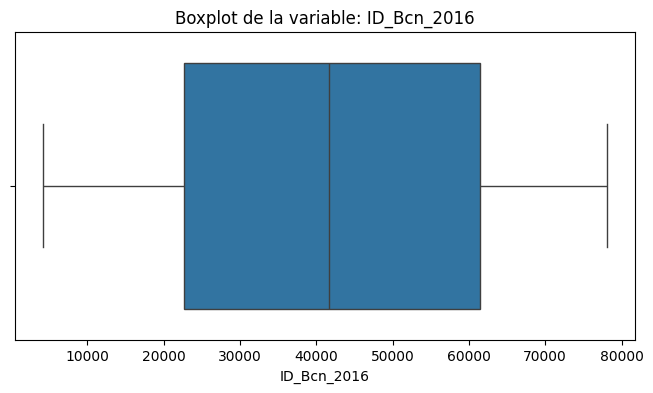

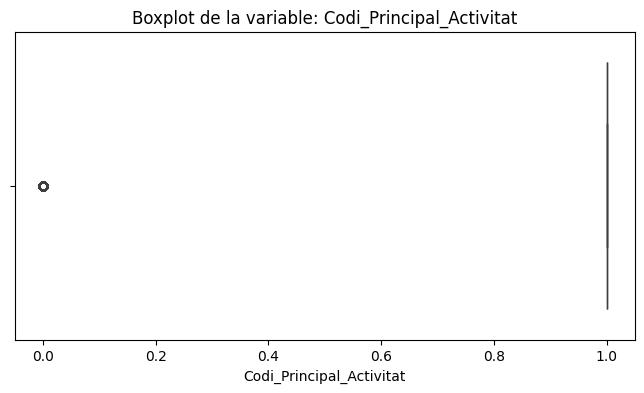

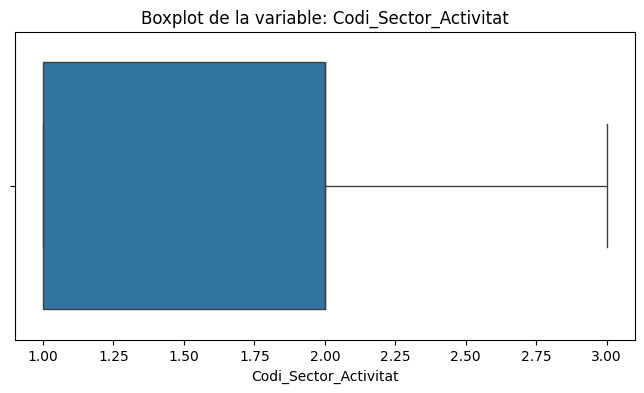

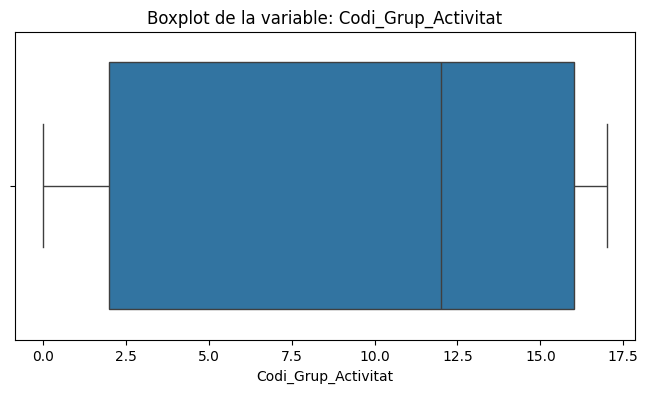

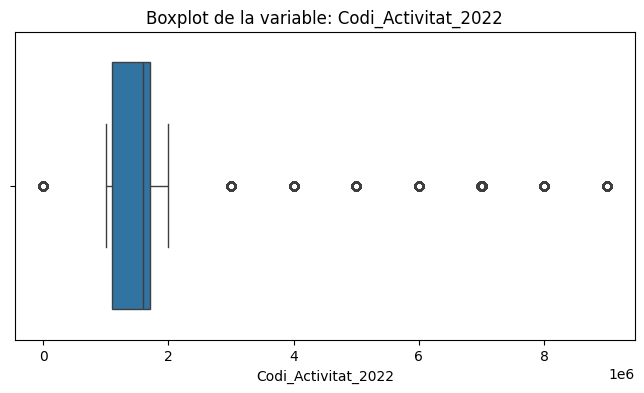

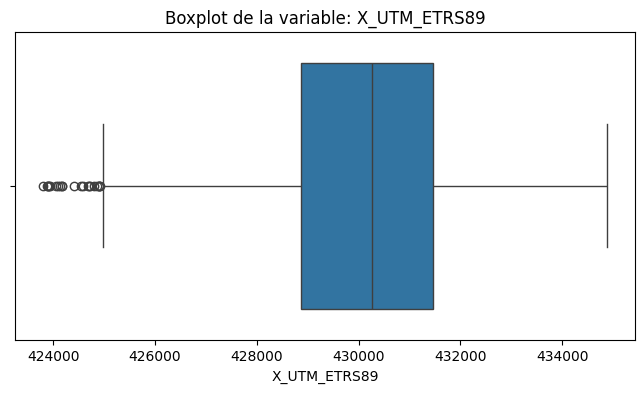

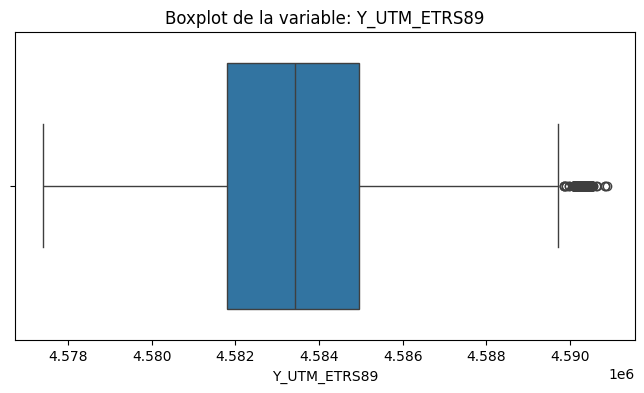

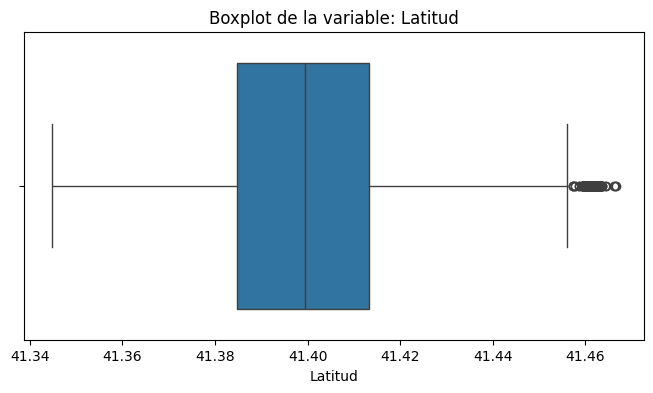

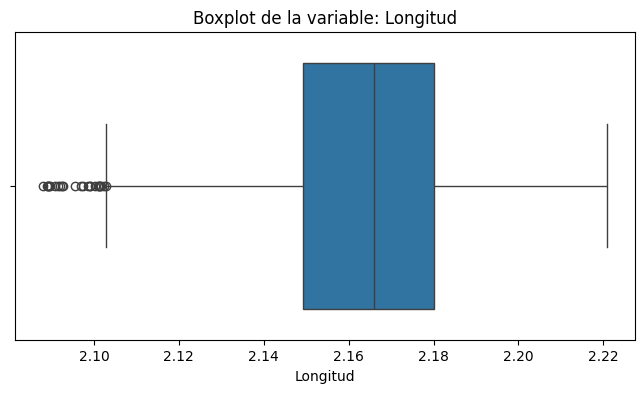

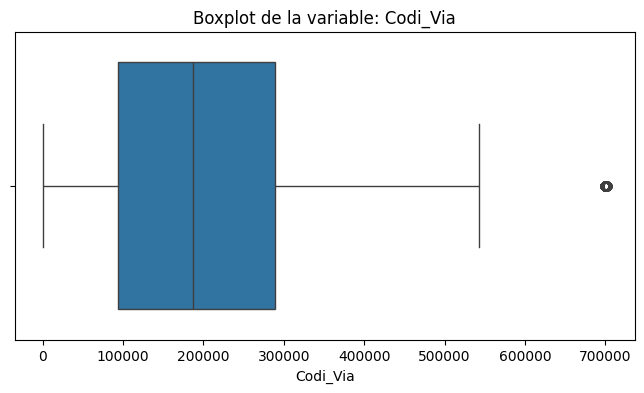

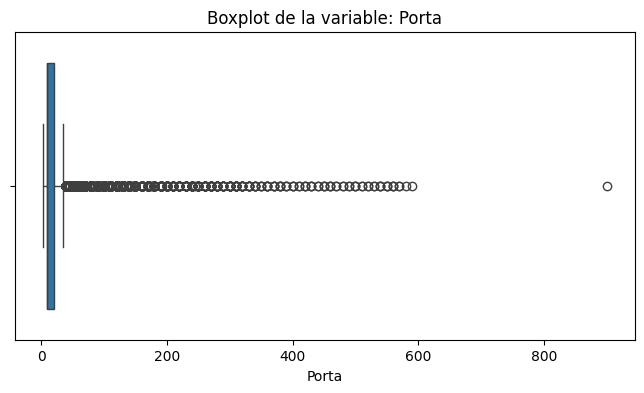

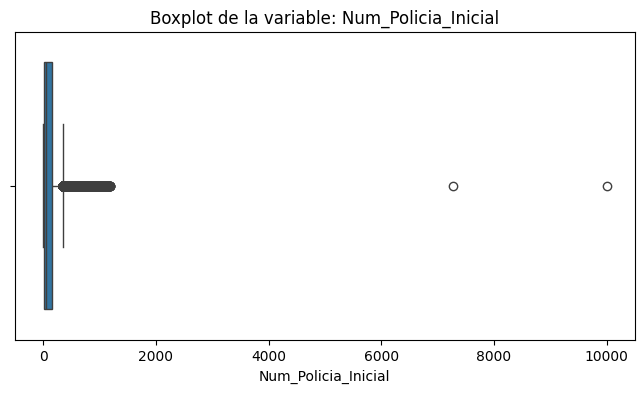

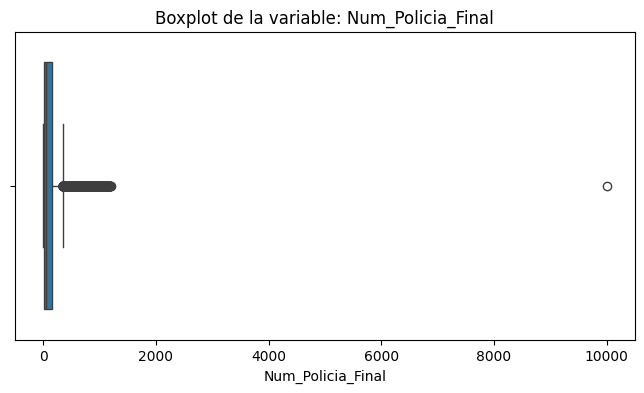

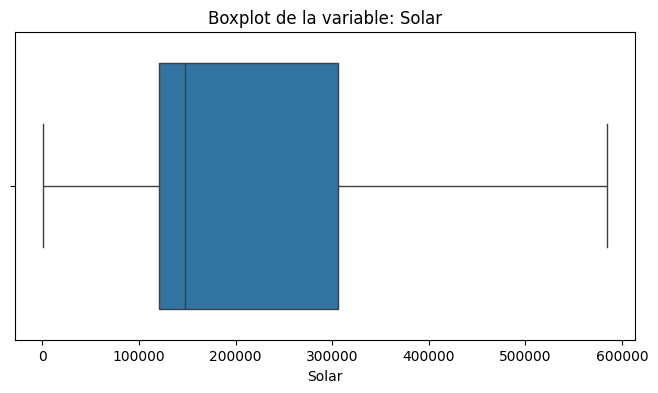

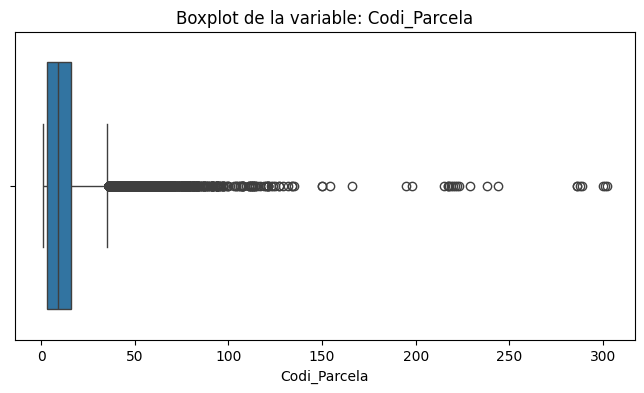

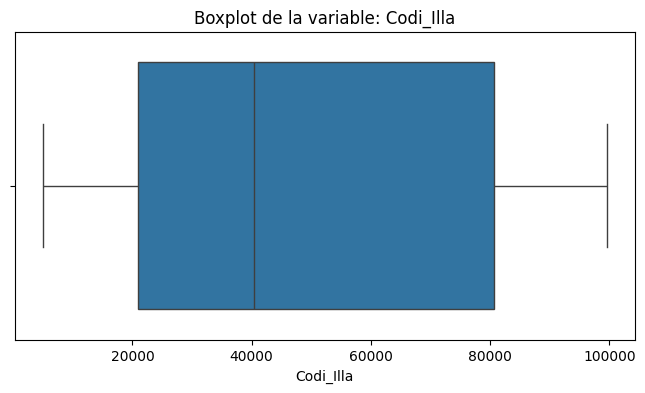

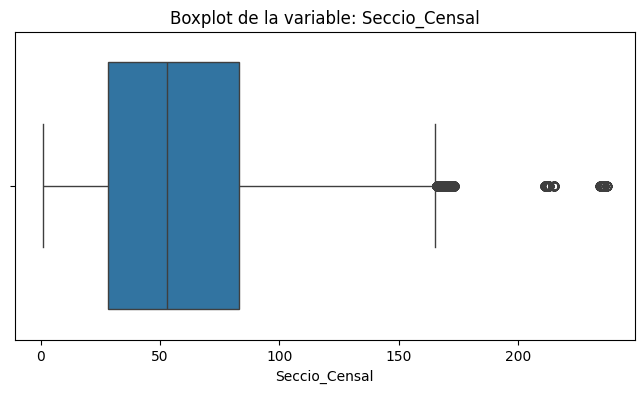

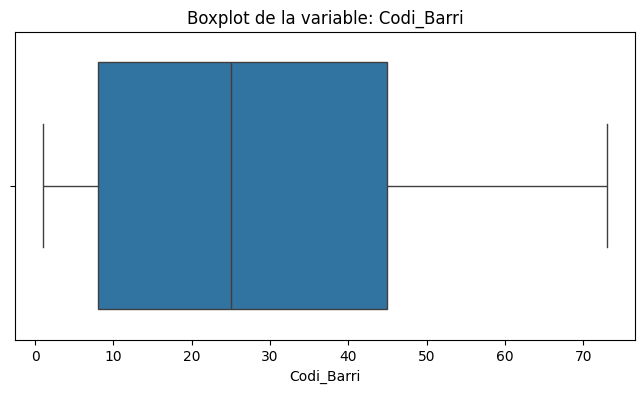

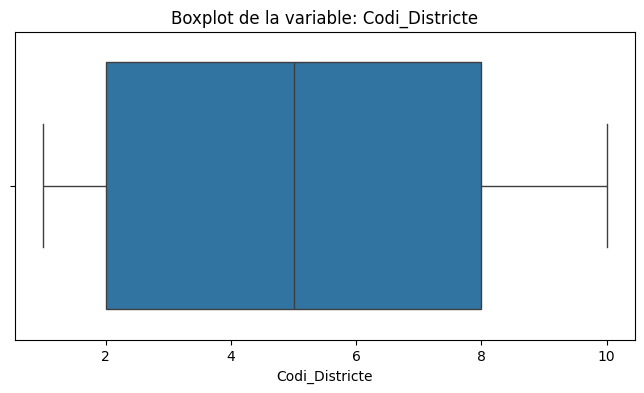

In [11]:
# VISUALIZACIÓN DE LA DISTRIBUCIÓN DE DATOS POR VARIABLE Y DETECCIÓN DE VARIABLES CON VALORES ATÍPICOS CON BOXPLOT

# Importación de librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns

# Identificación de variables numéricas
numerical_columns = df_2022.select_dtypes(include=['float64', 'int64']).columns

# Visualización de Boxplots para variables numéricas
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_2022[col])
    plt.title(f"Boxplot de la variable: {col}")
    plt.xlabel(col)
    plt.show()

### **Conclusiones del Análisis de la Distribución de Variables**

#### 1.- Distribución de Variables Numéricas:

- Al examinar los histogramas de las variables numéricas, se observa una distribución bastante diversa en varias de ellas. Algunas variables presentan una distribución normal, como __Latitud__ y __Longitud__, que parecen concentrarse en torno a un valor medio. Otras, como __Num_Policia_Inicial__ o __Solar__, presentan distribuciones sesgadas a la derecha, con una gran concentración de valores bajos y algunos valores altos que podrían indicar la presencia de outliers.
- La presencia de sesgo en varias variables sugiere que los datos no siguen una distribución uniforme o normal, lo que podría ser relevante para elegir el tipo de modelo o transformaciones adicionales a aplicar en el análisis.

#### 2.- Distribución de Variables Categóricas:

- Al analizar las variables categóricas mediante los countplots, se destaca que varias de ellas tienen una gran concentración de categorías dominantes. Por ejemplo, en las variables como __Nom_Barri__, __Nom_Districte__, o __Nom_Sector_Activitat__, las primeras categorías ocupan la mayor parte de la frecuencia, mientras que algunas categorías tienen una frecuencia baja o casi nula.
- Esto indica que hay categorías con poca representación en los datos, lo cual puede afectar la capacidad de generalización del modelo, y es algo a tener en cuenta para un análisis más detallado o para la posible consolidación de categorías.

#### 3.- Detección de Valores Atípicos (Outliers):

- Los boxplots de las variables numéricas han permitido identificar la presencia de valores atípicos (outliers) en varias columnas. Variables como __Num_Policia_Inicial__, __Solar__, y __Codi_Parcela__ presentan algunos valores que están fuera de los mñargenes, lo que sugiere la existencia de registros extremos o errores en los datos.
- Estos outliers podrían tener un impacto significativo en los resultados del modelo, por lo que es importante considerar si deben ser eliminados o tratados para mejorar la precisión y la generalización del modelo.

#### 4.- Implicaciones para el Modelo:

- La distribución sesgada de algunas variables numéricas sugiere que algunas de ellas podrían necesitar transformaciones (como logaritmos) para mejorar su distribución y hacerla más adecuada para ciertos modelos de machine learning.
- Las variables categóricas con muchas categorías y las frecuencias desbalanceadas habrán de tratarse de forma específica, ya sea mediante la consolidación de categorías menos frecuentes o mdeiante el uso de técnicas que manejen bien la alta cardinalidad.

### ANÁLISIS DE LA CORRELACIÓN DE VARIABLES NUMÉRICAS

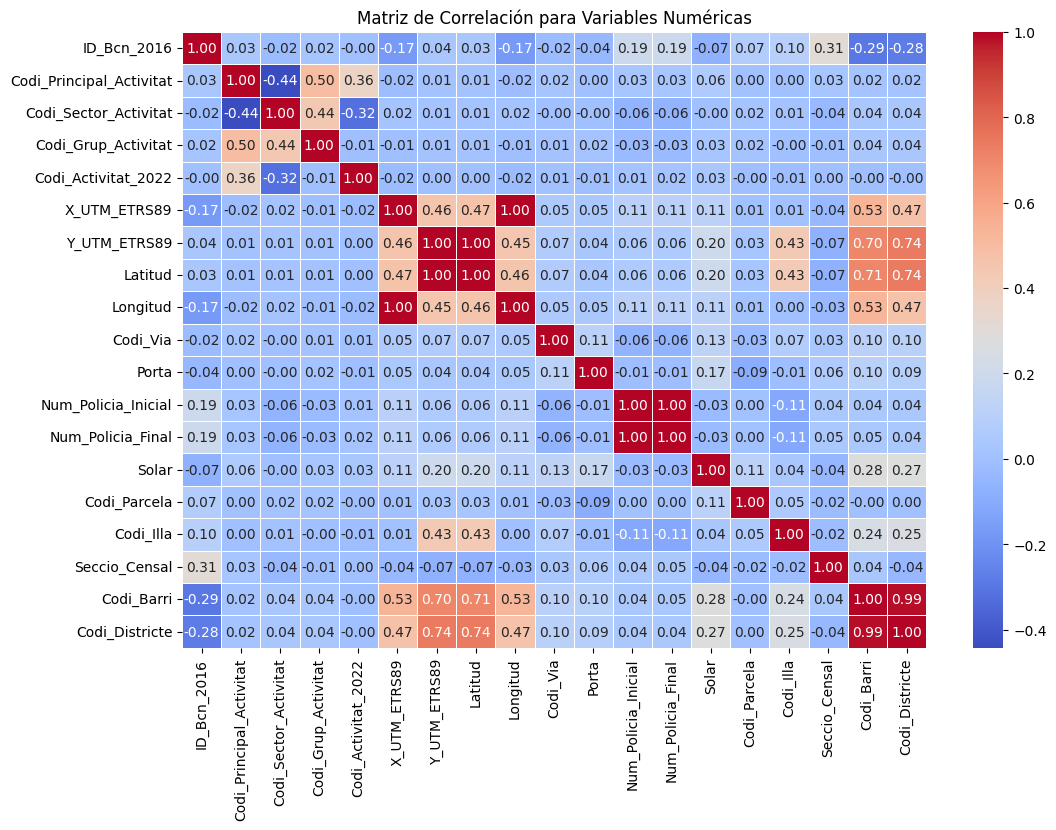

In [12]:
# Matriz de correlación
correlation_matrix = df_2022[numerical_columns].corr()

# Heatmap de la correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación para Variables Numéricas")
plt.show()

### **Conclusiones del Análisis de Correlación de Variables Numéricas**

#### 1.- Relaciones Fuertes Entre Variables:

- Se observa que existen correlaciones significativas entre algunas variables numéricas. Por ejemplo, __Latitud__ y __Longitud__ muestran una correlación moderada, lo que tiene sentido, ya que ambas representan coordenadas geográficas que probablemente están relacionadas entre sí.
- Otra relación destacada es la de __Num_Policia_Inicial__ y __Num_Policia_Final__, con una correlación alta, indicando que los valores iniciales y finales de la numeración de policía en las direcciones son estrechamente dependientes, lo que parece ser un comportamiento esperado.

#### 2.- Correlaciones Débiles o Nulas:

- También hay variables que presentan una correlación muy baja o nula, como la de __Codi_Parcela__ con __Latitud__ y __Longitud__. Esto sugiere que no existe una relación lineal entre estas variables y que podrían representar fenómenos independientes.

#### 3.- Variables con Alta Varianza:

- Algunas variables muestran una alta dispersión en sus valores, lo que podría indicar una gran variabilidad en los datos. Estas variables, como __Num_Policia_Inicial__, __Solar__ o __Codi_Parcela__, podrían ser útiles en el análisis si se busca entender patrones más complejos o diferencias entre observaciones, pero también pueden ser un indicio de presencia de outliers o registros erróneos que se deben tratar con cuidado.

#### 4.- Implicaciones para el Análisis:

- Las correlaciones altas nos indican qué variables podrían estar relacionadas o ser redundantes en los modelos predictivos. En este caso, donde tanto __Latitud__ como __Longitud__ podrían ser características relevantes, una de ellas podría eliminarse para evitar la duplicidad.
- Las correlaciones bajas con el resto de variables nos sugieren que cada variable puede aportar información única al modelo, y puede ser necesario realizar una exploración más profunda sobre su impacto.

#### 5.- Necesidad de Tratamiento:

Debo valorar la necesidad de tratar las variables correlacionadas para evitar redundancia en el modelos que vaya a ensayar y, si es necesario, aplicar transformaciones o combinaciones de variables (como PCA) para reducir la dimensionalidad sin perder información significativa. Lo tendré que ver más adelante.

### ANÁLISIS DE NORMALIDAD

In [13]:
# ANÁLISIS DE NORMALIDAD POR VARIABLE
# Prueba de Shapiro para ver si las diferentes variables numéricas siguen una distribución gausiana:

from scipy.stats import shapiro

# Crear un diccionario para almacenar los resultados de la prueba de Shapiro
shapiro_results = {}

# Seleccionar solo las columnas numéricas continuas
numerical_columns = df_2022.select_dtypes(include=['float64', 'int64']).columns

# Aplicar la prueba de Shapiro a cada una de las variables numéricas
for col in numerical_columns:
    # Eliminar los valores nulos para la prueba
    data = df_2022[col].dropna()
    
    # Aplicar la prueba de Shapiro-Wilk
    stat, p = shapiro(data)
    
    # Guardar el resultado (si es gaussiana o no)
    shapiro_results[col] = 'Gaussian' if p > 0.05 else 'Not Gaussian'

# Mostrar los resultados
shapiro_results

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


{'ID_Bcn_2016': 'Not Gaussian',
 'Codi_Principal_Activitat': 'Not Gaussian',
 'Codi_Sector_Activitat': 'Not Gaussian',
 'Codi_Grup_Activitat': 'Not Gaussian',
 'Codi_Activitat_2022': 'Not Gaussian',
 'X_UTM_ETRS89': 'Not Gaussian',
 'Y_UTM_ETRS89': 'Not Gaussian',
 'Latitud': 'Not Gaussian',
 'Longitud': 'Not Gaussian',
 'Codi_Via': 'Not Gaussian',
 'Porta': 'Not Gaussian',
 'Num_Policia_Inicial': 'Not Gaussian',
 'Num_Policia_Final': 'Not Gaussian',
 'Solar': 'Not Gaussian',
 'Codi_Parcela': 'Not Gaussian',
 'Codi_Illa': 'Not Gaussian',
 'Seccio_Censal': 'Not Gaussian',
 'Codi_Barri': 'Not Gaussian',
 'Codi_Districte': 'Not Gaussian'}

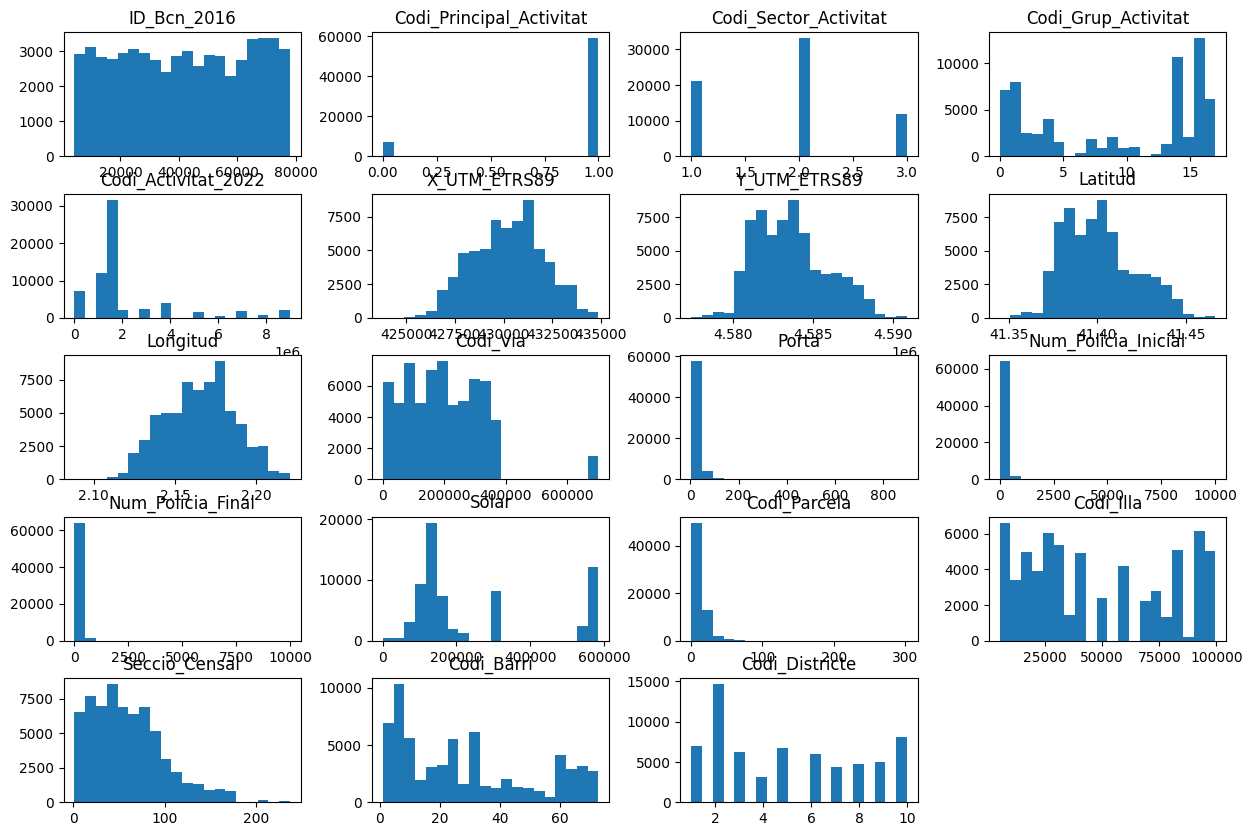

In [14]:
# VISUALIZACIÓN DE LA DISTRIBUCIÓN DE DATOS POR VARIABLE
df_2022.hist(figsize=(15, 10), bins=20, grid=False) 
plt.show()

### **Conclusiones del Análisis de Normalidad**

#### Resultados de la Prueba de Shapiro-Wilk:

- La prueba de Shapiro-Wilk muestra que la mayoría de las variables numéricas en el dataset no siguen una distribución normal, ya que el p-valor para todas las variables es menor que 0.05.
- Las variables como Latitud, Longitud, Porta, Num_Policia_Inicial, Solar, etc., tienen un comportamiento "Not Gaussian". Esto sugiere que los datos de estas variables no siguen una distribución normal.

- Se ha generado un advertencia sobre el tamaño de la muestra (más de 5000 observaciones), lo que puede afectar la precisión de los resultados de la prueba de Shapiro. Sin embargo, aún así es relevante para indicar que las distribuciones podrían no ser normales.

### **Conclusiones de la Visualización de la Distribución de Datos**

#### Histograma:

- Al observar el histograma de las variables numéricas, es evidente que las distribuciones son muy diversas. La mayoría de las variables no siguen una distribución simétrica, lo que refuerza los resultados obtenidos en la prueba de Shapiro.
- Algunas distribuciones muestran asimetría debido a los valores extremos o atípicos.

#### Implicaciones:

- La falta de normalidad puede tener implicaciones al aplicar ciertos métodos estadísticos que asumen distribuciones normales (como análisis de varianza o regresión lineal).
- Para esos modelos estadísticos que requieren normalidad, podría ser necesario transformar los datos (por ejemplo, mediante una transformación logarítmica) o usar métodos que no dependan de este supuesto (como modelos basados en árboles o métodos no paramétricos). Veremos si es necesario acudir a estos recursos, o no. 


### CONCLUSIONES GENERALES DERIVADAS DEL EDA

A continuación hago un análisis de las conclusiones basadas en todos los análisis estadísticos realizados previamente, e identifico las variables a mantener o eliminar para la aplicación del modelo de machine learning [SUPERVISADO/CLASIFICACION] que quiero ensayar.

#### 1. Análisis de la Distribución de Variables:

##### Variables Numéricas:

- Observo que la mayoría de las variables numéricas tienen distribuciones sesgadas (como __Latitud__, __Longitud__, __Porta__, __Solar__), lo que podría afectar la capacidad de algunos modelos (como los basados en supuestos de normalidad).
- Variables como __ID_Bcn_2016__, __Codi_Principal_Activitat__, __Codi_Sector_Activitat__, __Codi_Grup_Activitat__, entre otras, no tienen un comportamiento útil para la predicción ya que representan códigos numéricos, por lo que decido que serán eliminadas por no aportar información relevante.

##### Variables Categóricas:

- Algunas variables como __Nom_Barri__, __Nom_Districte__, __Nom_Sector_Activitat__ tienen muchas categorías diferentes, lo que puede ser útil en análisis de segmentación, pero con toda seguridad requieren de una codificación adecuada (como one-hot encoding) para poder aplicar el modelo.
- Variables como __Nom_Mercat__, __Nom_Galeria__, __Nom_CComercial__ presentan una cantidad muy limitada de datos (valores nulos o pocos valores), lo que las hace menos relevantes y, por lo tanto, eliminables.

#### 2. Análisis de Correlación de Variables Numéricas:

##### Correlación entre Variables:
- Las variables numéricas no presentan altas correlaciones entre sí, lo que indica que no existe multicolinealidad significativa en el dataset. Esto es positivo ya que no será necesario realizar transformaciones complejas para evitar la redundancia de información.
- Variables como __Num_Policia_Inicial__ y __Num_Policia_Final__ parecen tener una ligera correlación, pero no parecen aportar una información relevante, por lo que lo más sensato parece eliminarlas para la aplicación del modelo.

#### 3. Análisis de Normalidad:

#####  No Normalidad en las Variables Numéricas:
La prueba de Shapiro-Wilk revela que la mayoría de las variables numéricas no siguen una distribución normal, lo que es típico en datasets reales. Esto sugiere que deberíamos considerar modelos no paramétricos o aplicar transformaciones a las variables para mejorar la adecuación a los supuestos de normalidad si es necesario.

#####  Implicación:
Variables como __Latitud__, __Longitud__, __Solar__ podrían ser transformadas (por ejemplo, mediante una transformación logarítmica) para mejorar su comportamiento si se requieren en el modelo. Sin embargo, no parecen aportar una información demasiado relevante, por lo que lo más sensato parece eliminarlas tambien para la aplicación del modelo.

#### 4. Identificación de Valores Atípicos:

#####  Valores Atípicos (Outliers):
Los boxplots revelaron la presencia de valores atípicos en variables como __Solar__, __Porta__, __Num_Policia_Inicial__, entre otras. Estos valores atípicos podrían tener un gran impacto en los modelos lineales, por lo que lo más sensato parece eliminarlas tambien para la aplicación del modelo.


#### Conclusiones Finales sobre las Variables:

##### Variables a Mantener para el Modelo:
##### ==> Variables con Potencial Predictivo:

__Codi_Sector_Activitat__, __Codi_Grup_Activitat__, __Codi_Activitat_2022__: Códigos que representan las categorías de actividad, que pueden ser útiles si se codifican adecuadamente (por ejemplo, mediante one-hot encoding o label encoding).


##### ==> Variables Categóricas:

__Nom_Barri__, __Nom_Districte__, __Nom_Sector_Activitat__: Son variables con múltiples categorías, lo cual puede ser útil para análisis de segmentación o en modelos con codificación adecuada.

##### Variables a Eliminar o Transformar:

##### ==> Variables con alta cantidad de valores nulos o pocos valores:
__Nom_Mercat__, __Nom_Galeria__, __Nom_CComercial__: Estas variables tienen una cantidad insuficiente de datos o presentan muchos valores nulos. Se opta por eliminarlas ya que no contribuyen significativamente al modelo.

##### ==> Variables de Identificación o Códigos:
__ID_Global__, __ID_Bcn_2016__, __Codi_Via__, __Codi_Parcela__, etc.: Son variables que parecen ser identificadores y no aportan información predictiva. Se opta por eliminarlas ya que no aportan valor predictivo de ellas.


### PASOS A SEGUIR:

#### Transformaciones: 
Para las variables numéricas con distribuciones sesgadas, aplicaré transformaciones logarítmicas u otras técnicas que puedan mejorar la normalidad, en el caso que lo considere necesario, sino, las eliminaré.

#### Gestión de Outliers: 
Los outliers optaré por eliminarlos porque no favorecen al modelo.

#### Codificación de Variables Categóricas: 
Las variables categóricas las codificaré mediante one-hot encoding para que puedan ser utilizadas por los modelos de clasificación


# <span style="background-color: #333333; color: white"> <font color='#00FF00'>2.- PREPROCESAMIENTO DE DATOS Y PREPARACIÓN PARA EL MODELO
    
- Gestionar valores faltantes y atípicos, si existen.
- Codificar variables categóricas mediante técnicas como *One-Hot Encoding*.
- Escalar las variables numéricas para garantizar la homogeneidad en el análisis, si es necesario.

## 2.1.- Eliminación de Variables Irrelevantes

Eliminar las variables que no aportan valor predictivo: variables como __ID_Global__, __ID_Bcn_2016__, __Nom_Mercat__, __Nom_Galeria__, __Nom_CComercial__, __Num_Policia_Inicial__, __Num_Policia_Final__,  __Latitud__, __Longitud__, __Solar__ deben ser eliminadas porque no contribuyen a la predicción o tienen valores nulos en exceso.

In [15]:
# Eliminar columnas irrelevantes

# Especificar las columnas a eliminar
columns_to_drop = [
    'ID_Global', 'ID_Bcn_2016', 'Nom_Mercat', 'Nom_Galeria', 
    'Nom_CComercial', 'Num_Policia_Inicial', 'Num_Policia_Final', 
    'Latitud', 'Longitud', 'Solar'
]

# Eliminar las columnas irrelevantes del DataFrame
df_2022_cleaned = df_2022.drop(columns=columns_to_drop)

## 2.2.- Codificación de Variables Categóricas
Codificación One-Hot Encoding: Las variables categóricas como __Nom_Barri__, __Nom_Districte__, __Nom_Sector_Activitat__ las voy a transformar mediante __*one-hot encoding*__ para que los modelos de machine learning puedan trabajar de manera adecuada.

In [16]:
# Identificar las columnas categóricas a codificar
categorical_columns = ['Nom_Barri', 'Nom_Districte', 'Nom_Sector_Activitat']

# Verificar si las columnas categóricas existen en el DataFrame
existing_categorical_columns = [
    col for col in categorical_columns if col in df_2022_cleaned.columns
]

# Aplicar One-Hot Encoding a las columnas categóricas existentes
df_2022_encoded = pd.get_dummies(
    df_2022_cleaned, 
    columns=existing_categorical_columns, 
    drop_first=True
)

## 2.3.- Verificación del tipo de datos
Para asegurarme que todas las columnas son numericas

In [17]:
# Asegurarse de que todas las columnas sean numéricas
# Identificar columnas de tipo 'object' en caso de que haya quedado alguna sin procesar
object_columns = df_2022_encoded.select_dtypes(include=['object']).columns

if len(object_columns) > 0:
    print("Columnas de tipo object encontradas:", object_columns)
    # Procesar las columnas restantes según sea necesario
    for col in object_columns:
        # Convertir columnas categóricas restantes con codificación ordinal o eliminar si son innecesarias
        df_2022_encoded[col] = pd.factorize(df_2022_encoded[col])[0]

Columnas de tipo object encontradas: Index(['Nom_Principal_Activitat', 'Nom_Grup_Activitat', 'Nom_Activitat',
       'Codi_Activitat_2016', 'Nom_Local', 'SN_Oci_Nocturn', 'SN_Coworking',
       'SN_Servei_Degustacio', 'SN_Obert24h', 'SN_Mixtura', 'SN_Carrer',
       'SN_Mercat', 'SN_Galeria', 'SN_CComercial', 'SN_Eix', 'Nom_Eix',
       'Direccio_Unica', 'Nom_Via', 'Planta', 'Lletra_Inicial', 'Lletra_Final',
       'Referencia_Cadastral', 'Data_Revisio'],
      dtype='object')


## 2.4.- Visualización del dataframe que irá al modelo
Pido que me muestre el aspecto que tiene el dataframe con el que voy a ir a aplicar mis modelos de clasificación.

In [18]:
# Ver mi dataframe transformado
print("Resumen del DataFrame preprocesado:")
df_2022_encoded

Resumen del DataFrame preprocesado:


,Codi_Principal_Activitat,Nom_Principal_Activitat,Codi_Sector_Activitat,Codi_Grup_Activitat,Nom_Grup_Activitat,Codi_Activitat_2022,Nom_Activitat,Codi_Activitat_2016,Nom_Local,SN_Oci_Nocturn,...,Nom_Districte_Sant Andreu,Nom_Districte_Sant Martí,Nom_Districte_Sants-Montjuïc,Nom_Districte_Sarrià-Sant Gervasi,Nom_Sector_Activitat_Comerç al detall,Nom_Sector_Activitat_Comerç al detall /Engròs,Nom_Sector_Activitat_Locals buits en lloguer,Nom_Sector_Activitat_Locals buits en venda,Nom_Sector_Activitat_Locals buits en venda i lloguer,Nom_Sector_Activitat_Serveis
0,1,0,2,16,0,1600102,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,1,0,2,9,1,9000000,1,1,1,0,...,1,0,0,0,0,0,0,0,0,1
2,1,0,2,16,0,1600400,2,2,2,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0,2,9,1,9000000,1,1,3,0,...,1,0,0,0,0,0,0,0,0,1
4,1,0,2,16,0,1600400,2,2,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66083,1,0,3,17,0,1700200,8,8,46805,0,...,0,0,0,0,0,0,0,0,0,0
66084,1,0,2,9,1,9000000,1,1,46806,0,...,0,0,0,0,0,0,0,0,0,1
66085,1,0,2,9,1,9000000,1,1,46807,0,...,0,0,0,0,0,0,0,0,0,1
66086,1,0,2,14,7,1400001,19,19,0,0,...,0,0,0,0,0,0,0,0,0,1


# <span style="background-color: #333333; color: white"> <font color='#00FF00'>3.- ENTRENAMIENTO DEL MODELO
    
- Dividir el dataset en conjuntos de entrenamiento y prueba.
- Entrenar un modelo básico de clasificación como **Regresión Logística**, **Árboles de Decisión**, o **Random Forest**.
- Ajustar hiperparámetros básicos para optimizar el rendimiento.    

## 3.1.- Dividir el dataset en conjuntos de Entrenamiento y Prueba
Antes de entrenar el modelo, procedo a dividir los datos en un conjunto de entrenamiento y otro de prueba. 
Esto será lo que me permita evaluar el modelo de manera objetiva.
Como tengo riesgo de que se me haya quedado algún valor NAN por ahí suelto, aplico un código imputer para que me los rellene con la moda.

In [19]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Crear un imputador para rellenar los valores faltantes con la moda (most_frequent)
imputer = SimpleImputer(strategy='most_frequent')

# Dividir el dataset en variables predictoras (X) y la variable objetivo (y)
X = df_2022_encoded.drop(columns=['Nom_Principal_Activitat'])  # Variables predictoras
y = df_2022_encoded['Nom_Principal_Activitat']  # Variable objetivo

# Dividir en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar el imputador a X_train y X_test
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Verificar que ya no hay valores faltantes
print("Valores faltantes en X_train después de la imputación:")
print(X_train.isnull().sum().sum())

print("Valores faltantes en X_test después de la imputación:")
print(X_test.isnull().sum().sum())

Valores faltantes en X_train después de la imputación:
0
Valores faltantes en X_test después de la imputación:
0


## 3.2.- Selección del Modelo y Entrenamiento
Ya tengo los datos preparados para entrenarlos. Voy a elegir un modelo de clasificación y entrenarlo. 
De las opciones que generalmente se usan para clasificación: Árboles de Decisión, Random Forest, SVM (Support Vector Machines), o Redes Neuronales, decido empezar con Random Forest, porque es robusto y funciona bien en la mayoría de los casos.

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Inicializar el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = rf_model.predict(X_test)

# <span style="background-color: #333333; color: white"> <font color='#00FF00'>4.- EVALUACIÓN DEL MODELO
    
   - Evaluar el desempeño utilizando métricas clave como:
     - Precisión (*accuracy*).
     - Recall.
     - F1-score.
     - Matriz de confusión.
   - Identificar las variables más influyentes en la predicción del estado del local.

In [21]:
# Evaluar el desempeño del modelo con accuracy_score
print("Precisión (Accuracy) del modelo:")
print(accuracy_score(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión (Accuracy) del modelo:
1.0

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11784
           1       1.00      1.00      1.00      1434

    accuracy                           1.00     13218
   macro avg       1.00      1.00      1.00     13218
weighted avg       1.00      1.00      1.00     13218



## 4.1.- CONCLUSIONES A LA EVALUACIÓN DEL MODELO: 

La precisión (accuracy) es del 100% en el conjunto de prueba, lo cual indica que el modelo aplicado está clasificando perfectamente todas las instancias en el conjunto de prueba.

Esot que es una buena notica, puede resultar también sospechoso, pues puede deberse a diversas causas: 

### 1.- Posible sobreajuste (Overfitting)
La precisión perfecta (1.0) en ambas clases puede ser una señal de sobreajuste, especialmente si el conjunto de entrenamiento tiene características muy similares al conjunto de prueba o si el modelo ha aprendido "de memoria" los datos.
Si la precisión fuera tan alta también en datos no vistos o nuevos, eso sería un buen indicio. Pero en este caso, como la evaluación solo se ha hecho sobre los datos de prueba, será conveniente evaluar más profundamente el modelo, por ejemplo, utilizando técnicas como la validación cruzada.

### 2.- Desbalanceo en las clases
Hemos visto que el conjunto tiene 11,784 muestras de la clase 0 y 1,434 muestras de la clase 1. Sería interesante revisar si el modelo está sesgado hacia la clase mayoritaria (0), ya que los valores de precision, recall y f1-score son todos 1.00 para ambas clases.

En algunos casos, cuando los datos están muy desbalanceados, el modelo tienede a aprender a predecir siempre la clase mayoritaria. Sin embargo, el reporte muestra un buen desempeño en ambas clases, lo que sugiere que no es el caso aquí.

### 3.- Evaluación de la diversidad del conjunto de prueba
Para asegurarnos de que el modelo no esté aprendiendo patrones triviales, voy a verificar si el conjunto de prueba es representativo y diverso, cubriendo una amplia gama de situaciones. Si el conjunto de prueba es pequeño o no tiene suficiente variabilidad, es más probable que el modelo esté "memorizando" los datos.

Para ello aplicaré técnicas como la validación cruzada, con el fin de evaluar el modelo de manera más robusta.

### 4.- Métricas de Desempeño
Aunque el modelo tiene una precisión perfecta, también me gustaría revisar las métricas de recall y f1-score con más detalle, ya que pueden ofrecer información sobre el desempeño en clases desbalanceadas:

- __Recall__: Mide la capacidad del modelo para detectar todas las instancias positivas (en este caso, clase 1). Un valor de 1.0 en recall significa que todas las instancias de clase 1 han sido correctamente clasificadas.
- __F1-score__: La media armónica entre precision y recall. Un f1-score de 1.0 también indica que el modelo está equilibrado en cuanto a estas métricas.

Como los valores de todas las métricas están en 1.0, no parece haber un problema de desbalance o de mala clasificación.

## 4.2.- OTROS MÉTODOS DE VERIFICACIÓN: 

### 4.2.1- Validación Cruzada: 
Aplicar la validación cruzada para verificar la consistencia de los resultados y detectar posibles problemas de sobreajuste. Esto dividirá los datos en varias partes y entrenará el modelo varias veces con diferentes subconjuntos

In [22]:
# Verificar si hay NaN en X antes de la validación cruzada
print(X.isnull().sum().sum())  # Esto debería dar 0 si no hay valores faltantes

3229


In [23]:
from sklearn.model_selection import cross_val_score 

# Verificar si hay NaN en X antes de la validación cruzada
print(X.isnull().sum().sum())  # Esto debería dar 0 si no hay valores faltantes


# Aplicar Imputación de Nuevamente sobre Todo el Conjunto de Datos (Antes de la Validación Cruzada)
from sklearn.impute import SimpleImputer

# Crear el imputador para rellenar los valores faltantes con la moda
imputer = SimpleImputer(strategy='most_frequent')

# Aplicar el imputador a todo el conjunto de datos (X)
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Verificar que no haya valores faltantes
print(X_imputed.isnull().sum().sum())  # Esto debe ser 0 ahora

# Realizar la validación cruzada con los datos imputados
cv_scores = cross_val_score(rf_model, X_imputed, y, cv=5)
print(f"Precisión media en validación cruzada: {cv_scores.mean()}")

3229
0
Precisión media en validación cruzada: 1.0


### 4.2.2- Pipeline con Imputación y Validación Cruzada: 
Los pipelines permiten combinar varios pasos de procesamiento, como la imputación y la validación cruzada, en un solo proceso de manera fluida. Así, el imputador y el clasificador se integran en el mismo flujo de trabajo:

In [24]:
# Pipeline con Imputación y Validación Cruzada
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Crear el pipeline que primero imputa los valores faltantes y luego entrena el clasificador
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Realizar la validación cruzada con el pipeline
cv_scores = cross_val_score(pipeline, X, y, cv=5)
print(f"Precisión media en validación cruzada: {cv_scores.mean()}")

Precisión media en validación cruzada: 1.0


### 4.2.3- Matriz de Confusión: 
La matriz de confusión ayuda a ver cómo está funcionando el modelo, mostrando las predicciones correctas e incorrectas para cada clase.

In [25]:
# Importar librerías:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

[[11784     0]
 [    0  1434]]


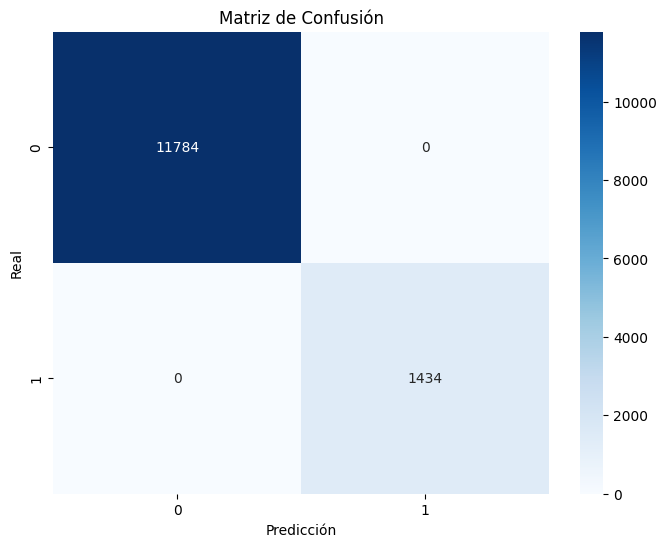

In [26]:
# Asegurarse de que el pipeline esté ajustado con el conjunto de entrenamiento
pipeline.fit(X_train, y_train)

# Realizar las predicciones sobre el conjunto de test
y_pred = pipeline.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
print(cm)

# Visualizar la matriz de confusión como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

### 4.2.4- Conclusión a los MÉTODOS DE VERIFICACIÓN

Los resultados obtenidos a partir de la validación cruzada, el pipeline y la matriz de confusión proporcionan una visión clara del rendimiento del modelo de clasificación utilizando Random Forest. A continuación se presenta un resumen detallado de los hallazgos clave:

__Validación Cruzada__: La validación cruzada se aplicó correctamente sobre los datos imputados para manejar los valores faltantes. El modelo ha obtenido una precisión media de 1.0 en las cinco particiones del conjunto de datos, lo que indica que el modelo ha alcanzado un rendimiento perfecto durante este proceso de validación. 

__Pipeline con Imputación y Validación Cruzada__: Al integrar el proceso de imputación de valores faltantes y la clasificación en un pipeline, se simplificó la implementación y se mejoró la reproducibilidad del flujo de trabajo. El modelo de Random Forest dentro del pipeline también ha mostrado una precisión perfecta de 1.0 en la validación cruzada, lo que refuerza los resultados obtenidos previamente. Este comportamiento sugiere que el modelo está entrenado y evaluado de manera eficiente.

__Matriz de Confusión__: La matriz de confusión del modelo muestra que no hubo predicciones incorrectas en el conjunto de prueba. Todos los casos fueron clasificados correctamente en sus respectivas clases (11784 instancias de clase 0 y 1434 instancias de clase 1), lo que indica un desempeño impecable en términos de precisión. No hubo falsos positivos ni falsos negativos, lo que implica que el modelo es capaz de distinguir perfectamente entre las dos clases.

__Reflexiones__:
- Rendimiento excepcional: El modelo ha demostrado un rendimiento excepcional tanto en la validación cruzada como en el conjunto de prueba, con una precisión perfecta en ambos casos. 

- Posible sobreajuste: Aunque los resultados son prometedores, una precisión perfecta podría ser una señal de que el modelo está sobreajustado a los datos de entrenamiento y prueba. 

- En resumen, el modelo muestra una gran capacidad de clasificación, pero es importante validar que los datos no estén sobreajustados y que el modelo esté generalizando bien, especialmente si en este caso los datos de entrenamiento y prueba pudiesen provenir de una distribución similar.

# <span style="background-color: #333333; color: white"> <font color='#00FF00'> 5.- CONCLUSIONES:
    
El análisis realizado sobre la base de datos de locales en Barcelona utilizando Machine Learning (en particular, el modelo de Random Forest) ha demostrado que se puede tomar una decisión informada y precisa sobre la viabilidad de los locales para el negocio de impresión editorial y exposición de arte. Los resultados obtenidos en términos de precisión perfecta, imputación efectiva de valores faltantes, y alta fiabilidad de las predicciones indican que el uso de Machine Learning es una herramienta poderosa y fiable para reducir el riesgo de elección equivocada de un local.

En términos prácticos, los modelos podrían ayudar a mi amiga a predecir las mejores zonas para su negocio, optimizar su selección de locales basándose en datos de calidad, y hacer recomendaciones de locales con mayor probabilidad de éxito. Esto añade una capa de objetividad al proceso, reduciendo la dependencia de factores subjetivos o intuiciones no verificadas, y ofreciendo una ventaja competitiva en el mercado.

El modelo de Random Forest ha mostrado una precisión perfecta (1.0) en la validación cruzada, lo que garantiza su fiabilidad para predecir correctamente la viabilidad de los locales. Además, la imputación de datos faltantes asegura que el modelo pueda manejar información incompleta y aún así hacer predicciones precisas. El uso de un pipeline integrado automatiza el proceso, reduciendo errores humanos y optimizando la selección de locales. La matriz de confusión demuestra que el modelo clasifica correctamente tanto los locales adecuados como los no adecuados, minimizando errores graves. Su capacidad de generalización le permite adaptarse a nuevos datos, lo que será útil al evaluar otros locales. En conjunto, estos resultados respaldan la fiabilidad del modelo, lo que justifica el uso de Machine Learning para tomar decisiones informadas y objetivas en la selección de locales para los negocios.

    


   